<a href="https://colab.research.google.com/github/tomas-viccei/F1-Telemetry-Data-Analysis-Project/blob/main/TP_TELEMETRIAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🏁 TRABAJO PRÁCTICO TELEMETRIAS 🏁**




# **INTEGRANTES:**

*🏎️ Andrisani, Facundo*

*🏎️ Feser, Ignacio*

*🏎️ Lauria, Francisco*

*🏎️ Viccei, Tomas*

# **ÍNDICES**

**EJERCICIO 1** [ir](#scrollTo=z4Qt3GBLGDhF)

**EJERCICIO 2** [ir](#scrollTo=ndh-UYG3lRWz)

**EJERCICIO 3** [ir](#scrollTo=A1R2KGRucuEe)

**EJERCICIO 4** [ir](#scrollTo=mWb5W0QirOa-)

**EJERCICIO 5** [ir](#scrollTo=k9j835P80MBD)

**EJERCICIO 6** [ir](#scrollTo=0NvfwZjffX14)

**EJERCICIO 7** [ir](#scrollTo=Iv3DiXoMKo_2)

**EJERCICIO 8** [ir](#scrollTo=Lts4TuY7lkId)

**EJERCICIO 9** [ir](#scrollTo=SXIIGmlICgXz)

**EJERCICIO 10** [ir](#scrollTo=xPDYVhs79LSH)



# 1



[VOLVER](#scrollTo=2-wU-YtgHjvd)

## **Importacion de datos**

In [ ]:
install.packages("readxl")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("RColorBrewer")
install.packages("stringr")
install.packages("patchwork")

library(stringr)
library(lubridate)
library(dplyr)
library(readxl)
library(ggplot2)
library(tidyr)
library("ggplot2")
library(patchwork)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
# Archivo
telOrig <- "Telemetria.xlsx"

# Obtener los nombres de las hojas
tel_teams <- excel_sheets(telOrig)

# Lee y combina las hojas
tel <- lapply(tel_teams, function(sheet) {
  read_excel(telOrig, sheet = sheet)
}) %>% bind_rows()

# Ahora `tel` contiene todos los datos combinados


In [ ]:
str(tel)

tibble [278,304 × 10] (S3: tbl_df/tbl/data.frame)
 $ carId           : chr [1:278304] "MER" "MER" "MER" "MER" ...
 $ trackLength     : chr [1:278304] "5798" "5798" "5798" "5798" ...
 $ lapNum          : chr [1:278304] "1" "1" "1" "1" ...
 $ binIndex        : chr [1:278304] "0" "1" "2" "3" ...
 $ lap_distance    : chr [1:278304] "2.79688" "2.79688" "2.79688" "3.625" ...
 $ lap_time        : chr [1:278304] "0.033" "0.033" "0.033" "0.0496667" ...
 $ lap_time_invalid: chr [1:278304] "1" "1" "1" "1" ...
 $ velocity_X      : chr [1:278304] "74.03" "74.03" "74.03" "74.0886" ...
 $ velocity_Y      : chr [1:278304] "-0.277313" "-0.277313" "-0.277313" "-0.280142" ...
 $ velocity_Z      : chr [1:278304] "0.044875" "0.044875" "0.044875" "0.0485515" ...


In [ ]:
tel$lap_distance <- as.numeric(tel$lap_distance)
tel$lapNum <- as.numeric(tel$lapNum)
tel$lap_time <- as.numeric(tel$lap_time)
tel$binIndex <- as.numeric(tel$binIndex)
tel$trackLength <- as.numeric(tel$trackLength)
tel$velocity_X <- as.numeric(tel$velocity_X)
tel$velocity_Y <- as.numeric(tel$velocity_Y)
tel$velocity_Z <- as.numeric(tel$velocity_Z)

str(tel)

tibble [278,304 × 10] (S3: tbl_df/tbl/data.frame)
 $ carId           : chr [1:278304] "MER" "MER" "MER" "MER" ...
 $ trackLength     : num [1:278304] 5798 5798 5798 5798 5798 ...
 $ lapNum          : num [1:278304] 1 1 1 1 1 1 1 1 1 1 ...
 $ binIndex        : num [1:278304] 0 1 2 3 4 5 6 7 8 9 ...
 $ lap_distance    : num [1:278304] 2.8 2.8 2.8 3.62 4.45 ...
 $ lap_time        : num [1:278304] 0.033 0.033 0.033 0.0497 0.0663 ...
 $ lap_time_invalid: chr [1:278304] "1" "1" "1" "1" ...
 $ velocity_X      : num [1:278304] 74 74 74 74.1 74.1 ...
 $ velocity_Y      : num [1:278304] -0.277 -0.277 -0.277 -0.28 -0.283 ...
 $ velocity_Z      : num [1:278304] 0.0449 0.0449 0.0449 0.0486 0.0522 ...


In [ ]:
dim(tel)

[1] 278304     10

In [ ]:
head(tel)

carId,trackLength,lapNum,binIndex,lap_distance,lap_time,lap_time_invalid,velocity_X,velocity_Y,velocity_Z
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
MER,5798,1,0,2.79688,0.0330000,1,74.0300,-0.277313,0.0448750
MER,5798,1,1,2.79688,0.0330000,1,74.0300,-0.277313,0.0448750
MER,5798,1,2,2.79688,0.0330000,1,74.0300,-0.277313,0.0448750
MER,5798,1,3,3.62500,0.0496667,1,74.0886,-0.280142,0.0485515
MER,5798,1,4,4.45312,0.0663333,1,74.1472,-0.282971,0.0522280
MER,5798,1,5,5.28125,0.0830000,1,74.2059,-0.285800,0.0559044


In [ ]:
tail(tel)

carId,trackLength,lapNum,binIndex,lap_distance,lap_time,lap_time_invalid,velocity_X,velocity_Y,velocity_Z
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
ALP,5798,6,5792,5792.18,86.2525,0,85.1253,0.313685,0.1057820
ALP,5798,6,5793,5793.23,86.2650,0,85.1565,0.311195,0.0956028
ALP,5798,6,5794,5794.29,86.2775,0,85.1877,0.308706,0.0854236
ALP,5798,6,5795,5795.34,86.2900,0,85.2189,0.306216,0.0752444
ALP,5798,6,5796,5795.34,86.2900,0,85.2189,0.306216,0.0752444
ALP,5798,6,5797,5795.34,86.2900,0,85.2189,0.306216,0.0752444


## **Agregando sectores**

**S1 desde metro 0 a 1933**

**S2 desde metro 1934 a 3867**

**S3 desde metro 3868 a 5798**

In [ ]:
tel <- tel %>%
  mutate(sector = case_when(
    binIndex >= 0 & binIndex <= 1932 ~ "s1",
    binIndex > 1932 & binIndex <= 3866 ~ "s2",
    binIndex > 3866 & binIndex <= 5798 ~ "s3",
    TRUE ~ NA_character_
  ))

tail(tel)


carId,trackLength,lapNum,binIndex,lap_distance,lap_time,lap_time_invalid,velocity_X,velocity_Y,velocity_Z,sector
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
ALP,5798,6,5792,5792.18,86.2525,0,85.1253,0.313685,0.1057820,s3
ALP,5798,6,5793,5793.23,86.2650,0,85.1565,0.311195,0.0956028,s3
ALP,5798,6,5794,5794.29,86.2775,0,85.1877,0.308706,0.0854236,s3
ALP,5798,6,5795,5795.34,86.2900,0,85.2189,0.306216,0.0752444,s3
ALP,5798,6,5796,5795.34,86.2900,0,85.2189,0.306216,0.0752444,s3
ALP,5798,6,5797,5795.34,86.2900,0,85.2189,0.306216,0.0752444,s3


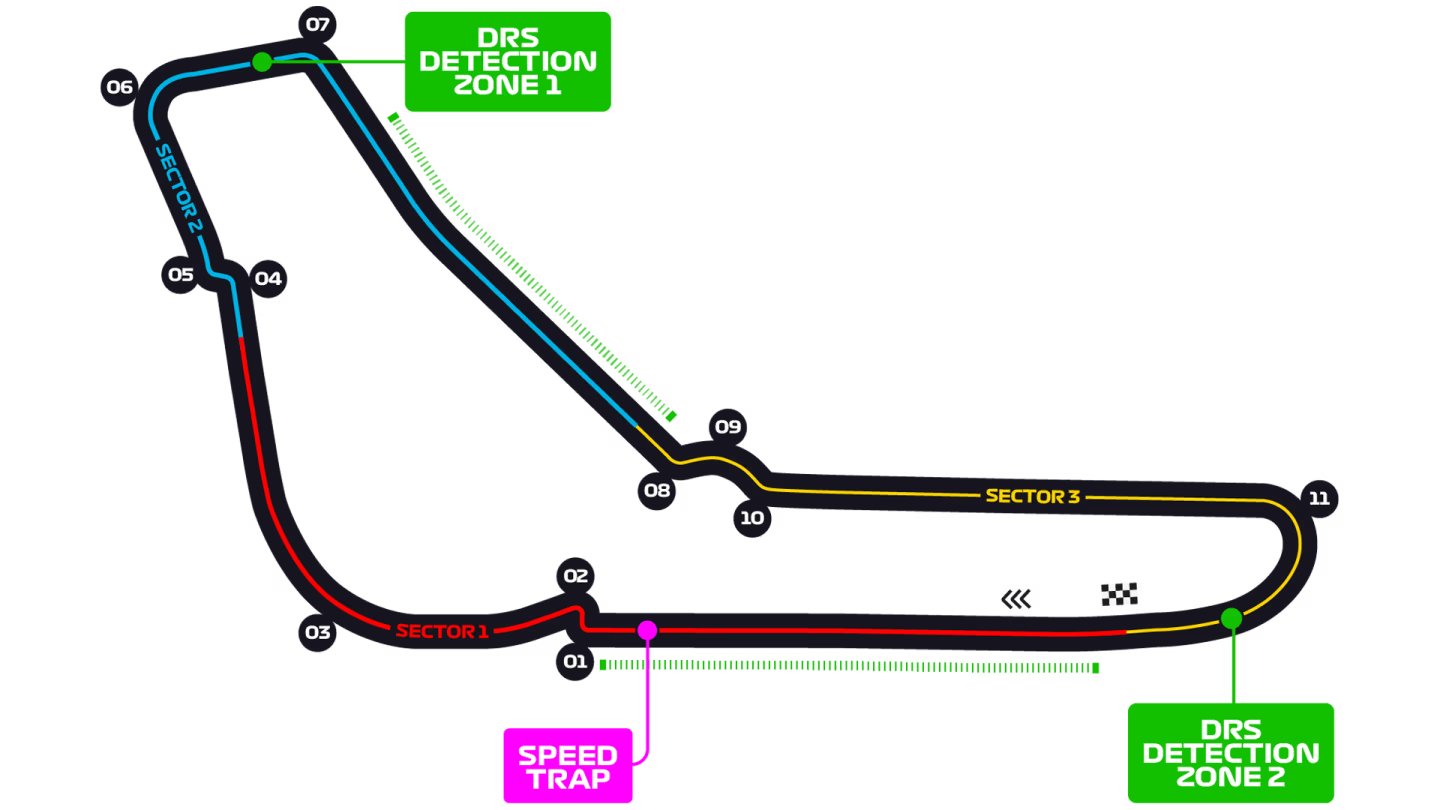

# 2.

[VOLVER](#scrollTo=2-wU-YtgHjvd)

 Elabore un gráfico que muestre el tiempo por vuelta para cada uno de los vehículos. En el eje de las abscisas (X), se representarán las vueltas, mientras que en el eje de las ordenadas (Y) se plasmará el tiempo empleado por cada vehículo en cada vuelta.

In [ ]:
colnames(tel)

[1] "carId"            "trackLength"      "lapNum"           "binIndex"        
 [5] "lap_distance"     "lap_time"         "lap_time_invalid" "velocity_X"      
 [9] "velocity_Y"       "velocity_Z"       "sector"

In [ ]:
tel1 <- tel %>%
  select(carId, lapNum, lap_time) %>%
  group_by(carId, lapNum) %>%
  summarize(tiempo = max(lap_time)) %>%
  arrange(carId, tiempo)

`summarise()` has grouped output by 'carId'. You can override using the
`.groups` argument.


In [ ]:
resultado <- table(tel$lapNum)
resultado


    1     2     3     4     5     6 
46384 46384 46384 46384 46384 46384 

In [ ]:
print(tel1)

# A tibble: 48 × 3
# Groups:   carId [8]
   carId lapNum tiempo
   <chr>  <dbl>  <dbl>
 1 ALP        6   86.3
 2 ALP        4   89.3
 3 ALP        5   97.4
 4 ALP        1  101. 
 5 ALP        2  101. 
 6 ALP        3  136. 
 7 ASM        1   97.1
 8 ASM        5   97.3
 9 ASM        6   97.5
10 ASM        3   99.3
# ℹ 38 more rows


In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)  # establece un tamaño predeterminado para los plots

## Grafico

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


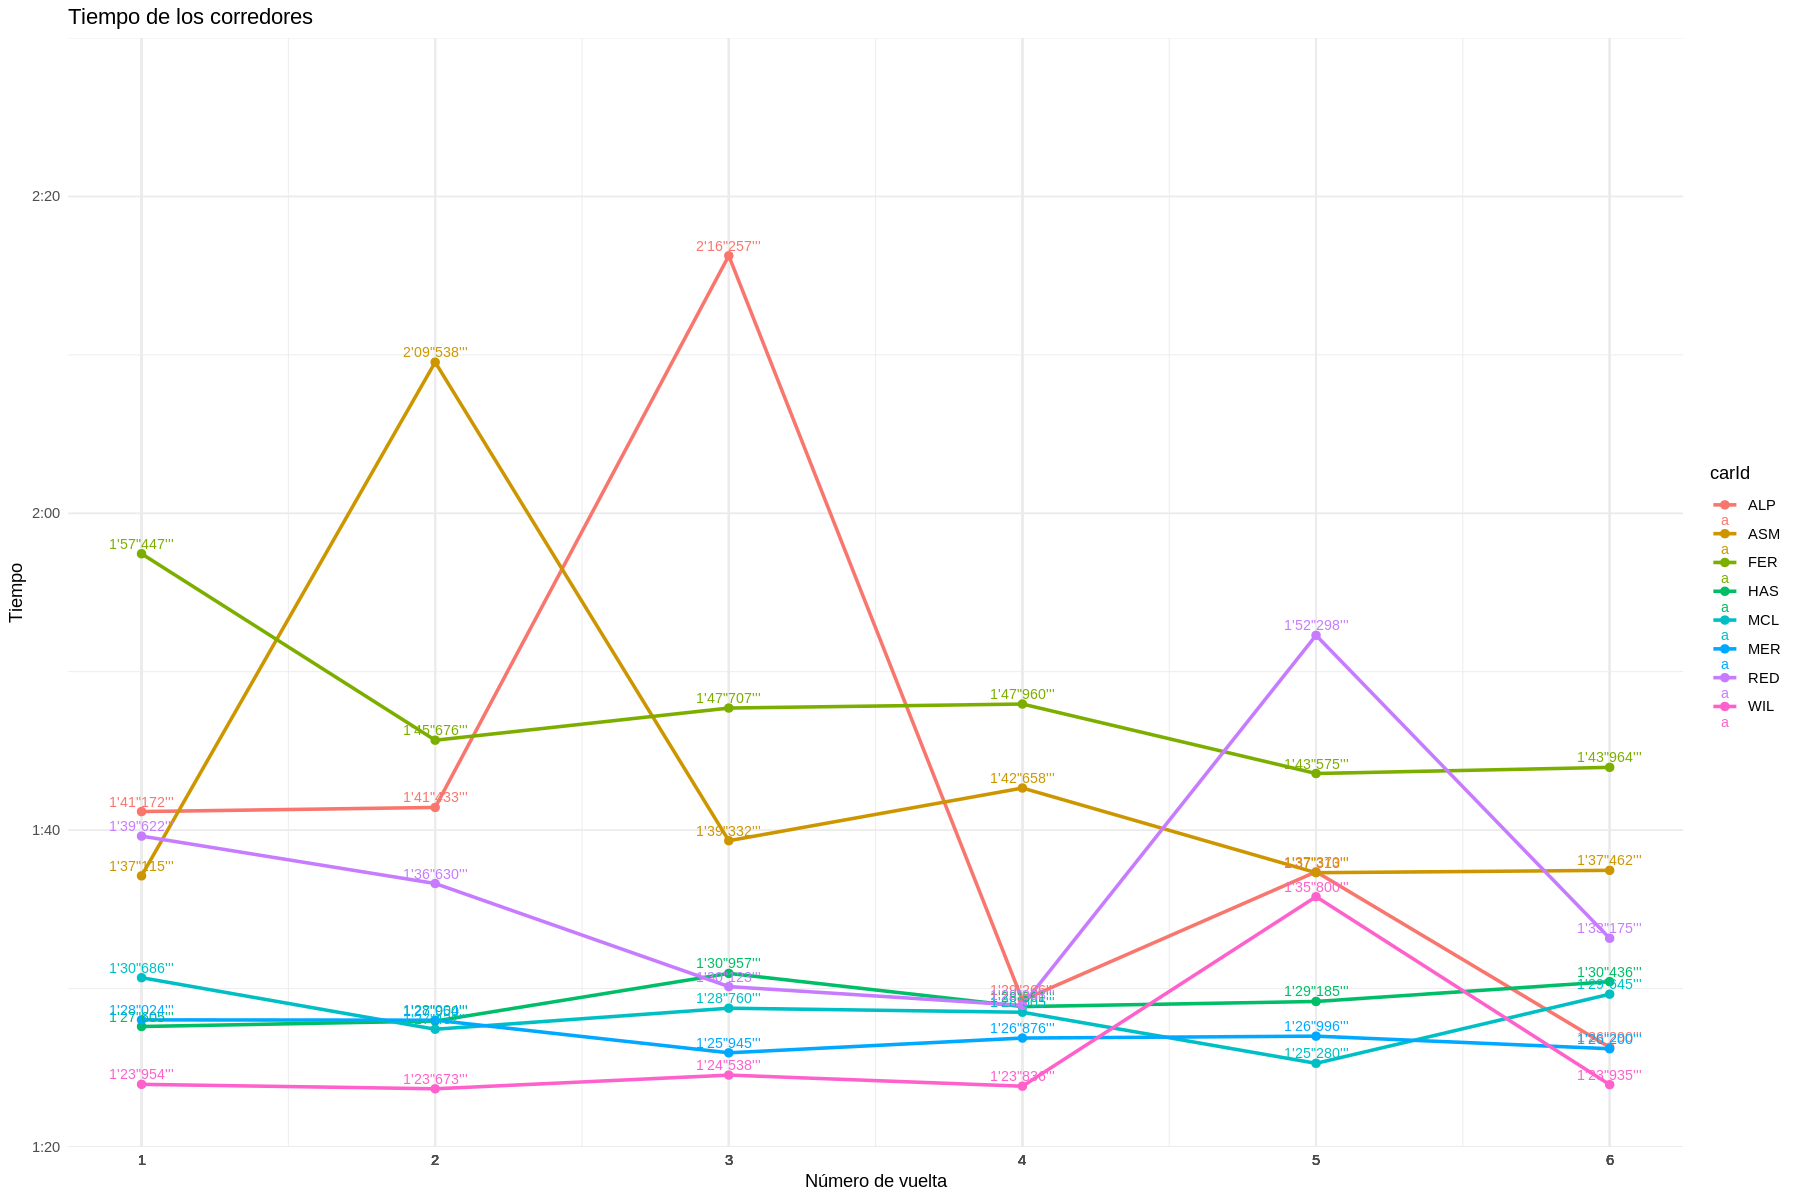

In [ ]:
# Graficar
ggplot(tel1, aes(x = lapNum, y = tiempo, group = carId, color = carId)) +
  geom_line(size = 1) +
  geom_point(size = 2) +
  geom_text(aes(label = paste0(
    floor(tiempo / 60), "'",
    str_pad(floor(tiempo %% 60), 2, pad = "0"), '"',
    str_pad(round((tiempo %% 1) * 1000), 3, pad = "0"), "'''"
  )), vjust = -0.5, size = 3) +  # Formato MM:SS:SSS
  labs(x = "Número de vuelta", y = "Tiempo", title = "Tiempo de los corredores") +
  theme_minimal() +
  scale_x_continuous(breaks = tel1$lapNum) +
  scale_y_continuous(
    limits = c(80, 150),  # Establecer límite inferior en 60 segundos
    labels = function(x) paste0(
      floor(x / 60), ":", str_pad(floor(x %% 60), 2, pad = "0")
    ),  # Mostrar en formato MM:SS
    expand = c(0, 0)  # Eliminar espacio extra en los márgenes
  )


# 3.


[VOLVER](#scrollTo=2-wU-YtgHjvd)

 Represente gráficamente la información correspondiente a los tiempos de vuelta para cada vehículo mediante diagramas de caja (boxplots) y diagrama de violín.

Box plot

Warning message:
“The dot-dot notation (`..y..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(y)` instead.”


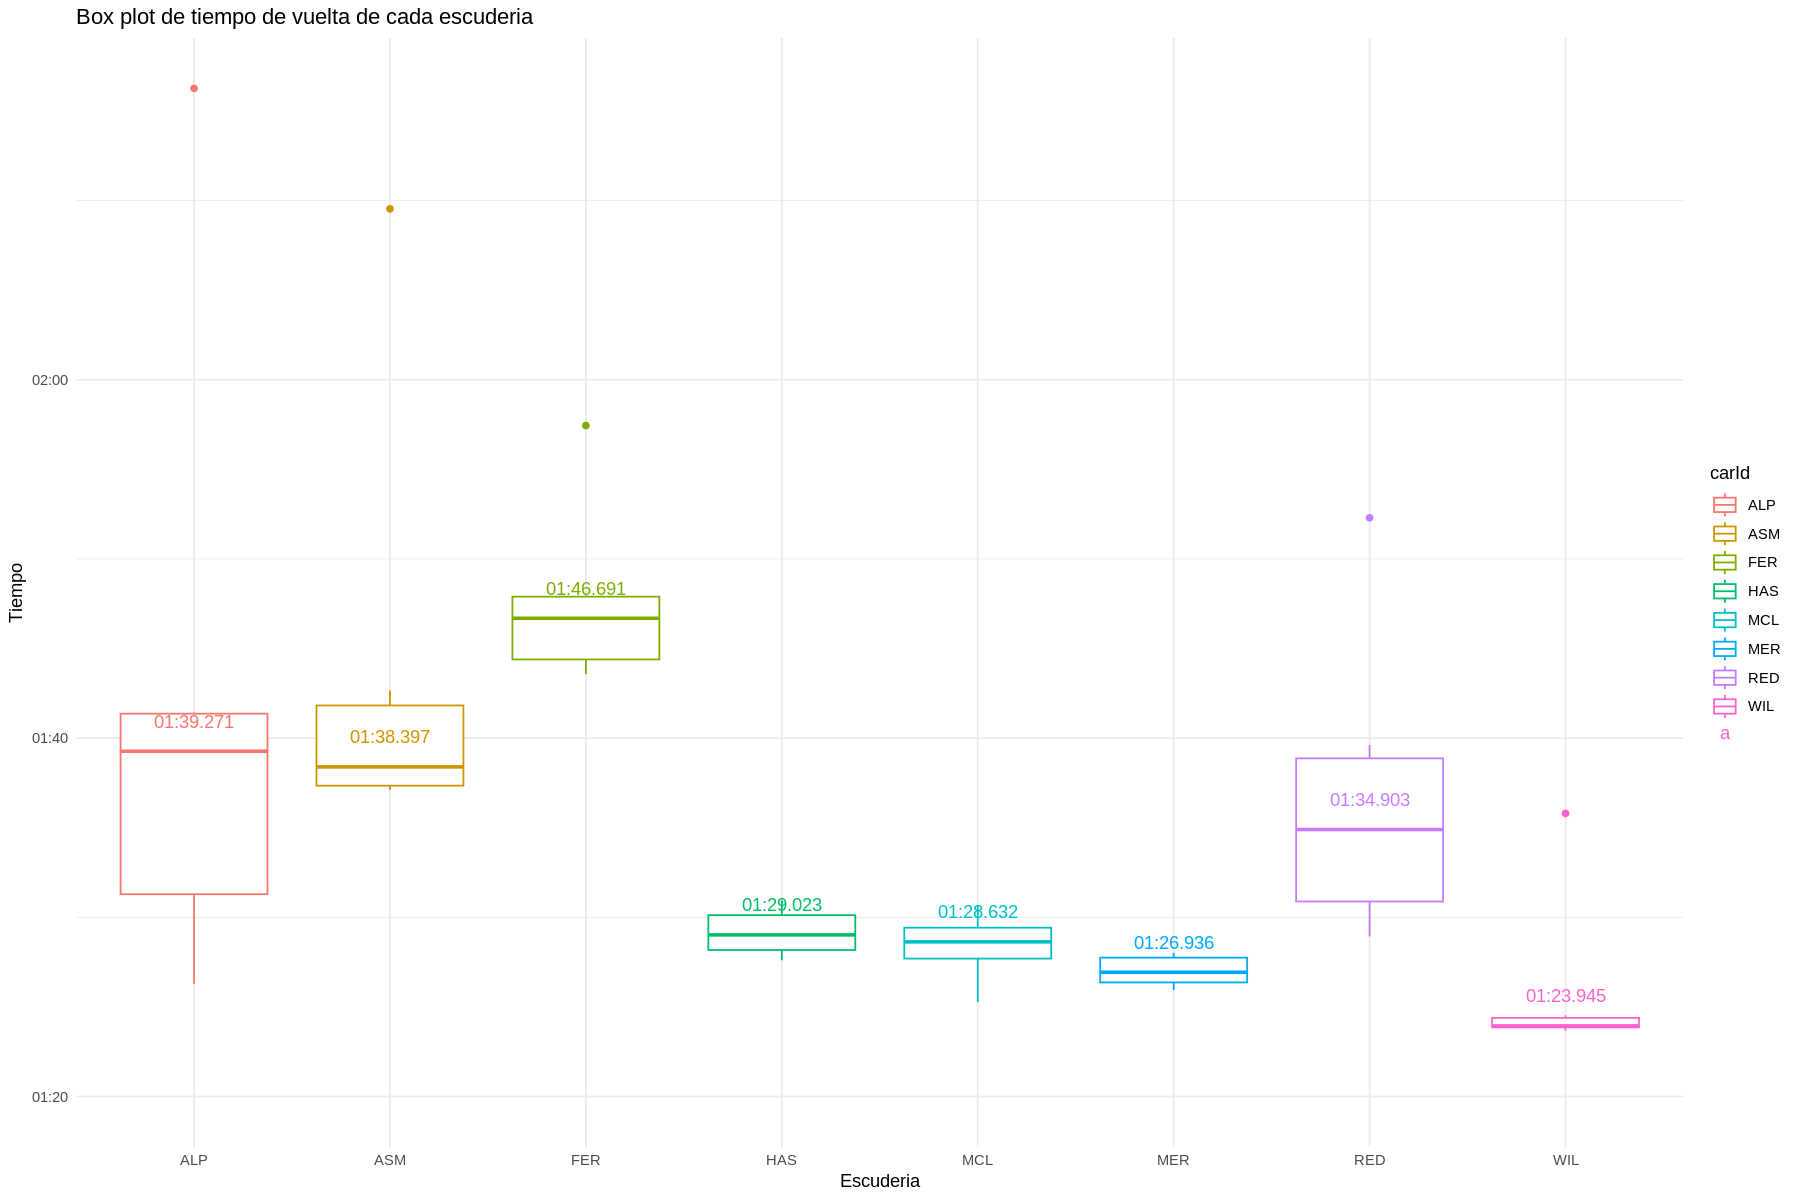

In [ ]:
format_time <- function(x) {
  minutes <- floor(x / 60)
  seconds <- round(x %% 60, 3)  # Redondear a 3 decimales para milisegundos
  sprintf("%02d:%05.3f", minutes, seconds)  # Formato Minutos:Segundos.Milisegundos
}

ggplot(tel1, aes(x = carId, y = tiempo, color = carId)) +
  geom_boxplot() +
  labs(x = "Escuderia", y = "Tiempo", title = "Box plot de tiempo de vuelta de cada escuderia") +
  stat_summary(fun = median, geom = "text",
               aes(label = format_time(..y..)), vjust = -1.8) +  # Formateamos la mediana
  theme_minimal() +
  scale_x_discrete() +
  scale_y_continuous(
    limits = c(80, max(tel1$tiempo)),  # Establecer límite inferior en 60 segundos (1 minuto)
    labels = function(x) format(as.POSIXct(x, origin = "1970-01-01", tz = "UTC"), "%M:%S"),  # Mostrar en formato Minutos:Segundos
  )

Grafico de Violin

Warning message:
“Removed 171 rows containing missing values or values outside the scale range
(`geom_violin()`).”


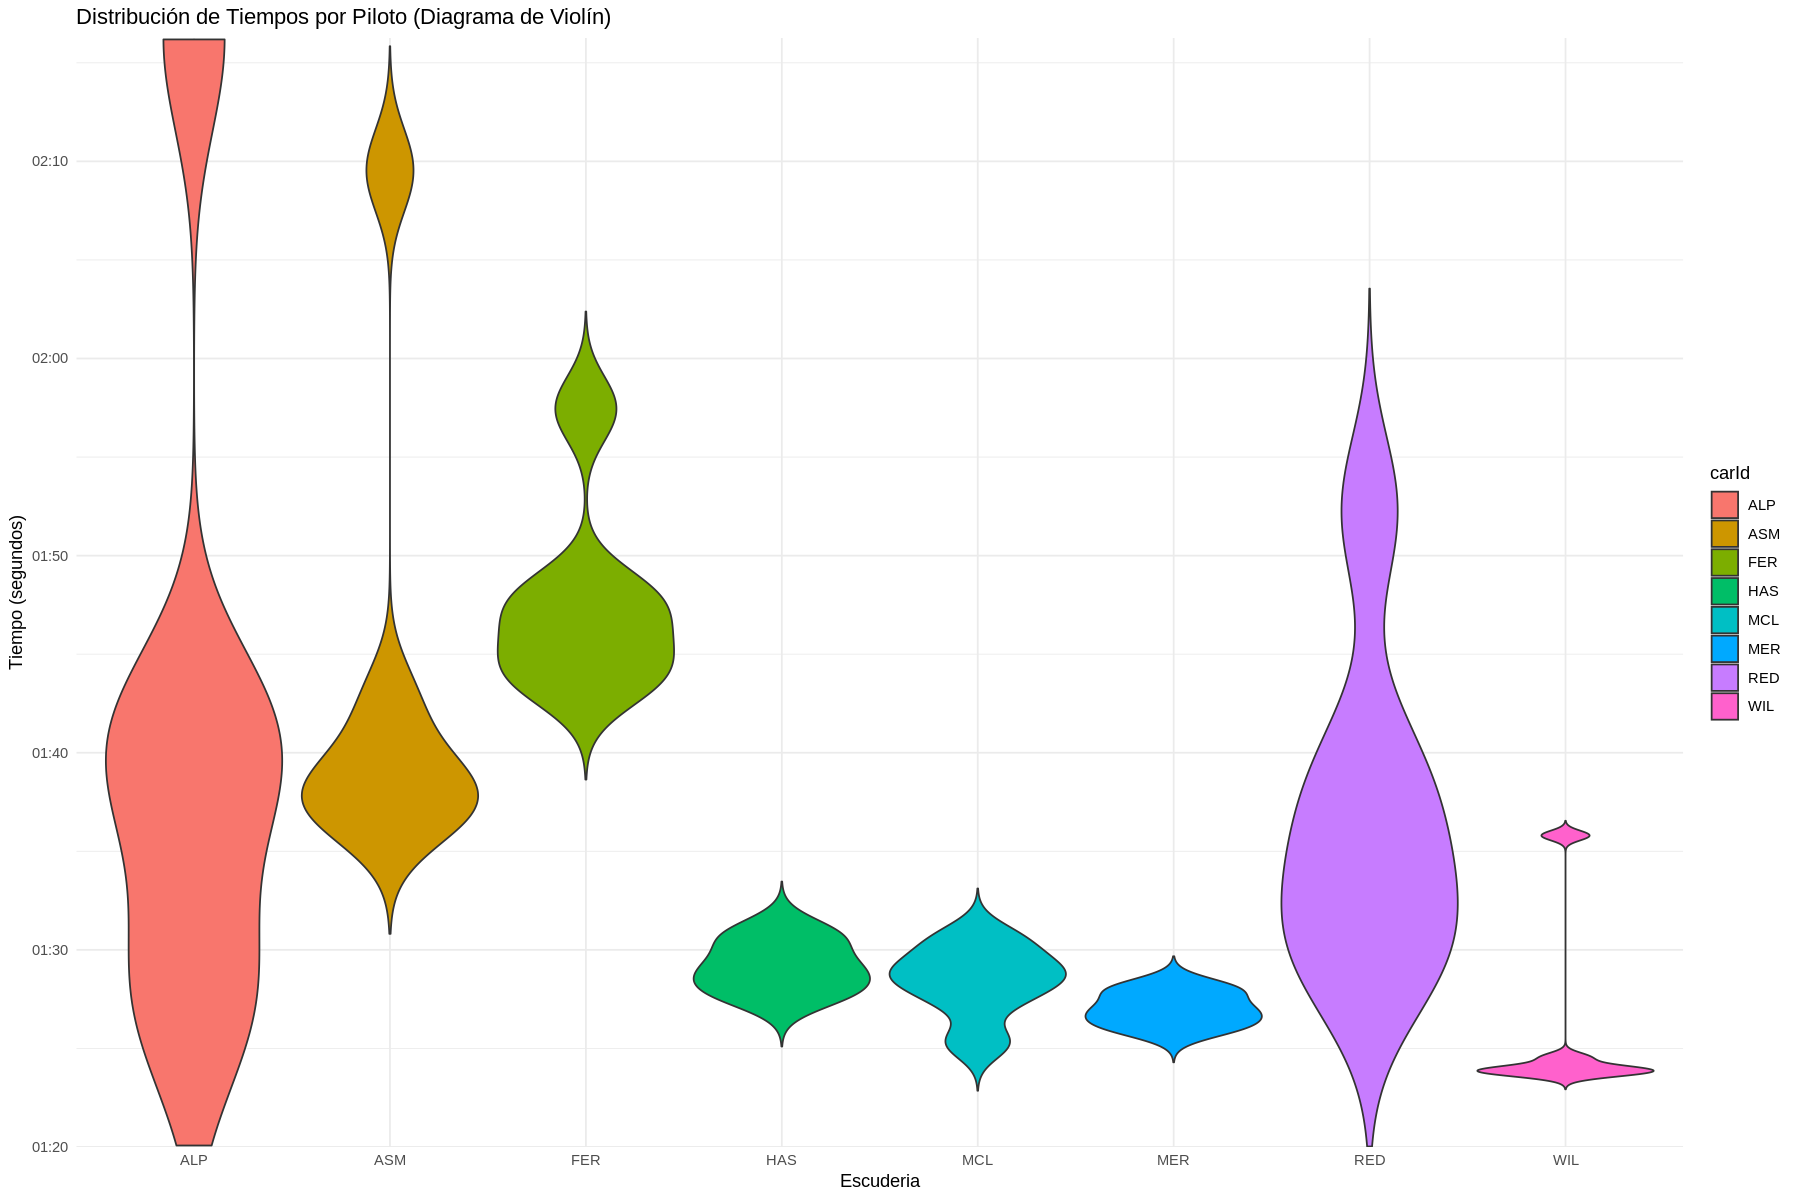

In [ ]:
ggplot(tel1, aes(x = carId, y = tiempo, fill = carId)) +
  geom_violin(trim = FALSE, scale="width") +  # 'trim = FALSE' asegura que los violines no se recorten # agregar
  labs(x = "Escuderia", y = "Tiempo (segundos)", title = "Distribución de Tiempos por Piloto (Diagrama de Violín)") +
  theme_minimal() +
  scale_x_discrete() +  # Asegúrate de que el eje x sea discreto
  scale_y_continuous(
    limits = c(80, max(tel1$tiempo)),  # Límite inferior en 80 segundos, ajusta según tu rango
    labels = function(x) format(as.POSIXct(x, origin = "1970-01-01", tz = "UTC"), "%M:%S"),  # Formato Minutos:Segundos
    expand = c(0, 0)  # Eliminar espacio extra en los márgenes
  )

# 4.

[VOLVER](#scrollTo=2-wU-YtgHjvd)

4. Elabore un cuadro donde se muestre para cada uno de los vehículos, el mejor tiempo de vuelta (lap_time), el mejor tiempo registrado en cada uno de los sectores y la velocidad máxima registrada en cada uno de los vehículos. El gráfico debe estar ordenado en base al mejor tiempo de vuelta del más rápido al más lento.

In [ ]:
colnames(tel)

[1] "carId"            "trackLength"      "lapNum"           "binIndex"        
 [5] "lap_distance"     "lap_time"         "lap_time_invalid" "velocity_X"      
 [9] "velocity_Y"       "velocity_Z"       "sector"

In [ ]:
# Mejor tiempo de vuelta para cada coche
tel3 <- tel %>%
  select(carId, lapNum, lap_time) %>%
  group_by(carId, lapNum) %>%
  summarize(tiempo = max(lap_time, na.rm = TRUE), .groups = "drop") %>%  # Máximo tiempo por vuelta
  group_by(carId) %>%
  arrange(carId, tiempo) %>%
  slice(1) %>%  # Mejor vuelta para cada coche
  arrange(tiempo, carId)  # Ordenado por mejor tiempo y carId

# Mejor tiempo por sectores
tel32 <- tel %>%
  select(carId, lapNum, lap_time, sector) %>%
  group_by(carId, sector, lapNum) %>%
  summarize(tiempoS = max(lap_time, na.rm = TRUE), .groups = "drop") %>%
  group_by(carId, lapNum, sector) %>%
  summarize(tiempoS = min(tiempoS, na.rm = TRUE)) %>%
  arrange(carId, lapNum, sector) %>%
  mutate(tiempoDiferencia = if_else(sector == "s1", tiempoS, tiempoS - lag(tiempoS))) %>% #lag() fila anterior
  arrange(carId, sector, tiempoDiferencia) %>%
  group_by(carId, sector) %>%
  slice_min(tiempoDiferencia, n = 1) %>%
  select(-lapNum, -tiempoS)

tel32

# Velocidad máxima para cada coche
tel33 <- tel %>%
  select(carId, velocity_X, velocity_Y, velocity_Z) %>%
  mutate(speed = sqrt(velocity_X^2 + velocity_Y^2 + velocity_Z^2) * 3.6) %>%  # Calcular velocidad en km/h
  group_by(carId) %>%
  summarize(max_speed = max(speed, na.rm = TRUE), .groups = "drop")  # Velocidad máxima por coche


`summarise()` has grouped output by 'carId', 'lapNum'. You can override using
the `.groups` argument.


carId,sector,tiempoDiferencia
<chr>,<chr>,<dbl>
ALP,s1,27.8570
ALP,s2,30.6655
ALP,s3,27.7675
ASM,s1,29.1293
ASM,s2,33.9873
ASM,s3,31.2760
FER,s1,30.7804
FER,s2,36.5827
FER,s3,33.0903


### Por mejor vuelta

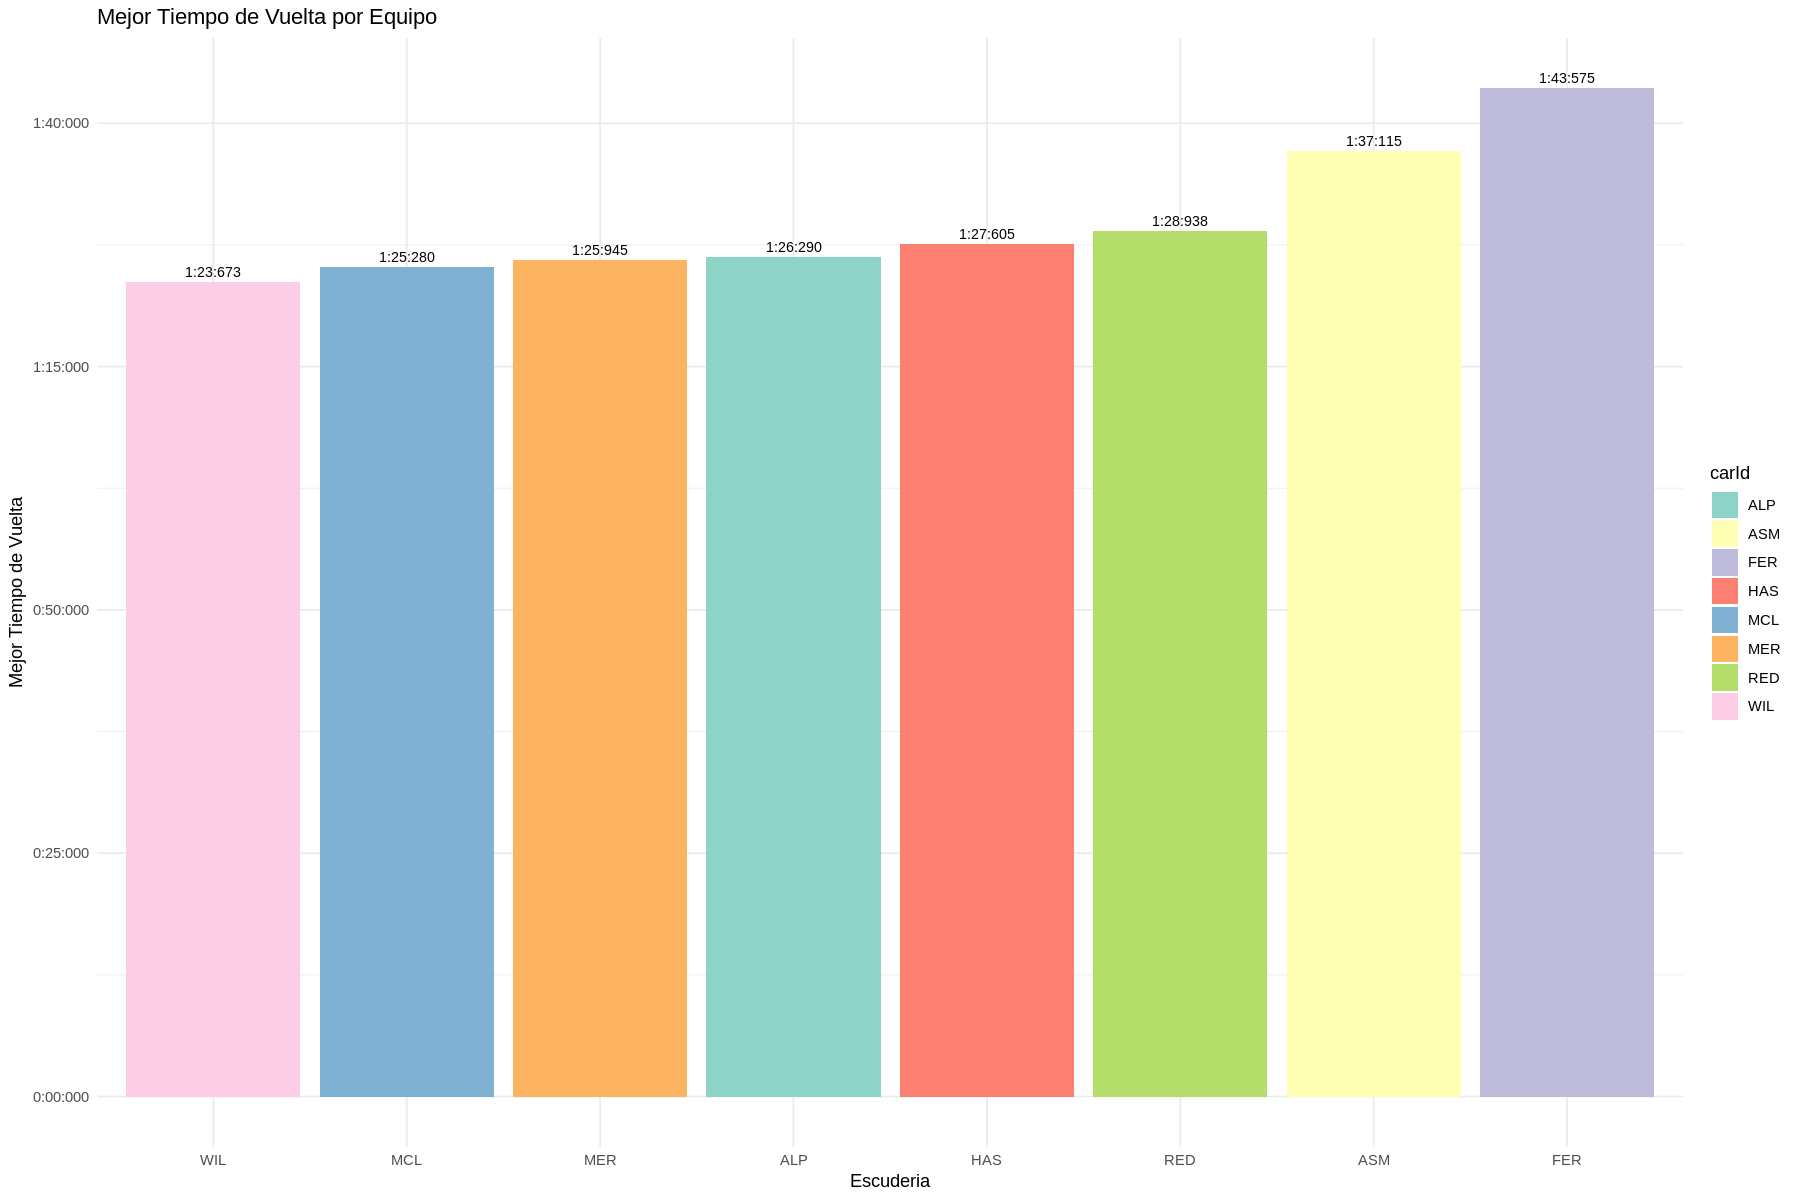

In [ ]:
ggplot(tel3, aes(x = reorder(carId, tiempo), y = tiempo, fill = carId)) +
  geom_bar(stat = "identity") +  # 'stat = "identity"' usa los valores ya dados en 'tiempo'
  geom_text(aes(label = paste0(
    floor(tiempo / 60), ":", str_pad(floor(tiempo %% 60), 2, pad = "0"), ":",
    str_pad(round((tiempo %% 1) * 1000), 3, pad = "0")
  )), vjust = -0.5, size = 3) +  # Añadir etiquetas sobre las barras
  labs(
    title = "Mejor Tiempo de Vuelta por Equipo",
    x = "Escuderia",
    y = "Mejor Tiempo de Vuelta"
  ) +
  theme_minimal() +  # Tema limpio y minimalista
  scale_fill_brewer(palette = "Set3") +  # Color de las barras usando una paleta de colores
  scale_y_continuous(labels = function(x) paste0(
    floor(x / 60), ":", str_pad(floor(x %% 60), 2, pad = "0"), ":",
    str_pad(round((x %% 1) * 1000), 3, pad = "0")
  ))  # Mostrar en formato minutos:segundos:milisegundos en el eje Y


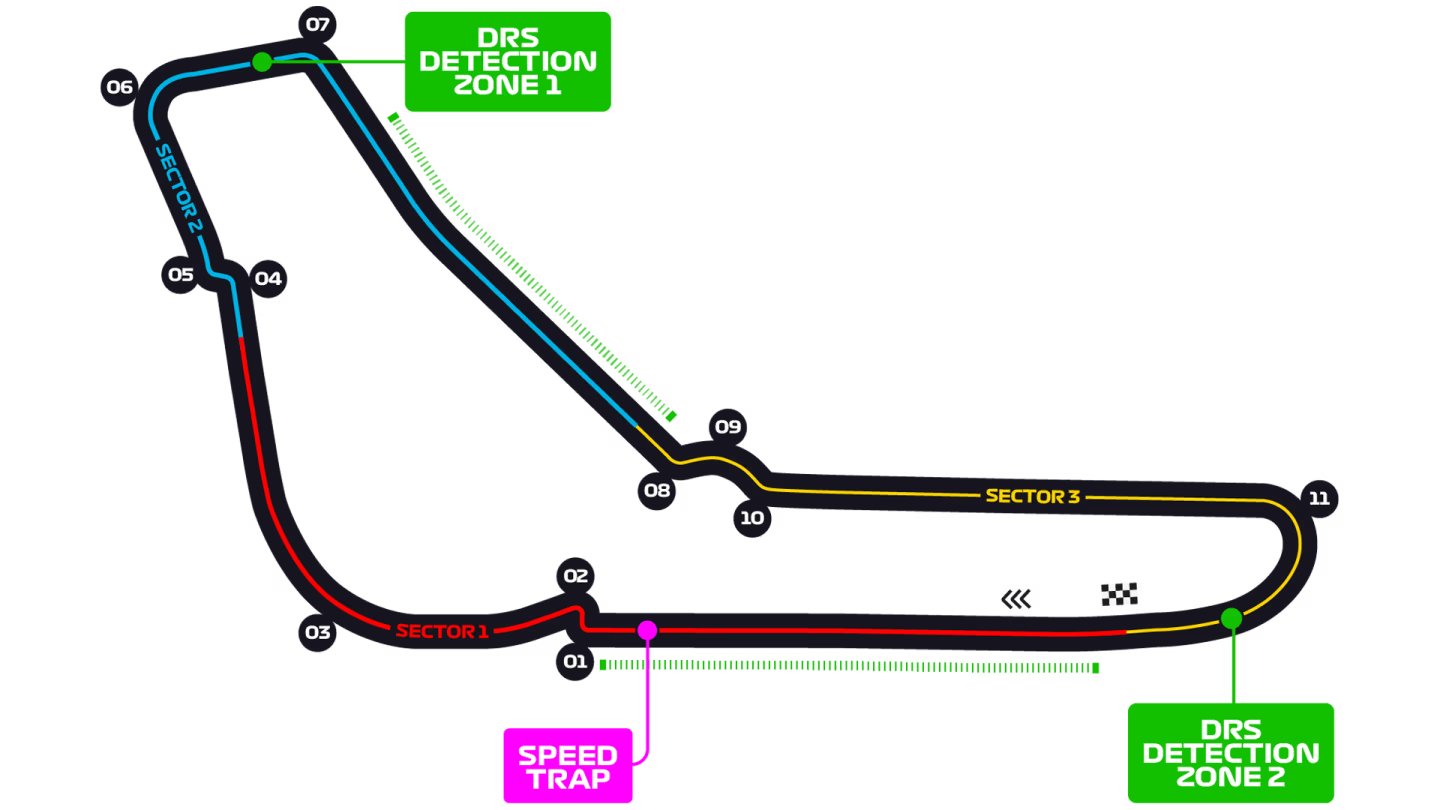

### Cuadro total

In [ ]:
tel3 <- tel3 %>%
  select(-lapNum)

head(tel3, 3)

carId,tiempo
<chr>,<dbl>
WIL,83.673
MCL,85.280
MER,85.945


In [ ]:
tel32 <- tel32 %>%
  pivot_wider(
    names_from = sector,  # Los valores de la columna 'sector' serán los nombres de las nuevas columnas
    values_from = tiempoDiferencia # Asegúrate de usar 'tiempoRestado' en lugar de 'tiempoS', ya que es la columna ajustada
  )
# Visualizamos los primeros resultados
head(tel32, 8)


carId,s1,s2,s3
<chr>,<dbl>,<dbl>,<dbl>
ALP,27.8570,30.6655,27.7675
ASM,29.1293,33.9873,31.2760
FER,30.7804,36.5827,33.0903
HAS,27.6740,30.6375,28.4770
MCL,27.7150,29.9850,27.5800
MER,27.5770,29.5750,27.7165
RED,28.1490,32.6420,28.1470
WIL,26.9837,29.1385,27.0435


In [ ]:
tabla <- inner_join(tel3, tel32)
tabla <- inner_join(tabla, tel33)

tabla

Joining with `by = join_by(carId)`
Joining with `by = join_by(carId)`


carId,tiempo,s1,s2,s3,max_speed
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
WIL,83.673,26.9837,29.1385,27.0435,349.1968
MCL,85.280,27.7150,29.9850,27.5800,348.8944
MER,85.945,27.5770,29.5750,27.7165,337.4084
ALP,86.290,27.8570,30.6655,27.7675,337.3254
HAS,87.605,27.6740,30.6375,28.4770,336.9559
RED,88.938,28.1490,32.6420,28.1470,336.9915
ASM,97.115,29.1293,33.9873,31.2760,326.4707
FER,103.575,30.7804,36.5827,33.0903,304.4076


In [ ]:
convert_to_time_format <- function(seconds) {
  minutes <- floor(seconds / 60)  # Obtener los minutos
  remaining_seconds <- floor(seconds %% 60)  # Obtener los segundos restantes
  milliseconds <- round((seconds %% 1) * 1000)  # Obtener los milisegundos
   # Formatear como 'MM:SS.mmm'
  formatted_time <- sprintf("%02d:%02d.%03d", minutes, remaining_seconds, milliseconds)
  return(formatted_time)
}

tabla$s1 <- sapply(tabla$s1, convert_to_time_format)
tabla$s2 <- sapply(tabla$s2, convert_to_time_format)
tabla$s3 <- sapply(tabla$s3, convert_to_time_format)
tabla$tiempo <- sapply(tabla$tiempo, convert_to_time_format)
tabla$max_speed <- round(tabla$max_speed)

tabla

carId,tiempo,s1,s2,s3,max_speed
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
WIL,01:23.673,00:26.984,00:29.139,00:27.044,349
MCL,01:25.280,00:27.715,00:29.985,00:27.580,349
MER,01:25.945,00:27.577,00:29.575,00:27.717,337
ALP,01:26.290,00:27.857,00:30.666,00:27.768,337
HAS,01:27.605,00:27.674,00:30.637,00:28.477,337
RED,01:28.938,00:28.149,00:32.642,00:28.147,337
ASM,01:37.115,00:29.129,00:33.987,00:31.276,326
FER,01:43.575,00:30.780,00:36.583,00:33.090,304


# 5.

[VOLVER](#scrollTo=2-wU-YtgHjvd)

Elabore un gráfico que represente las variaciones en las posiciones de cada una de los pilotos a lo largo de la carrera. En el eje de las abscisas (X) se deben mostrar las vueltas, mientras que en el eje de las ordenadas (Y) se indicará la posición ocupada por cada escudería.

In [ ]:
tel4 <- tel %>%
  select(carId, lapNum, lap_time) %>%
  group_by(carId, lapNum) %>%
  summarize(tiempo = max(lap_time), .groups = 'drop') %>% # Agrupa por auto y vuelta; guarda el tiempo máximo en tiempo.
  arrange(carId, lapNum) %>%
  group_by(carId) %>%
  mutate(tiempo_acumulado = cumsum(tiempo)) %>% # Agrupa por auto y calcula el tiempo acumulado de vueltas.
  group_by(lapNum) %>%
  arrange(tiempo_acumulado) %>%
  mutate(posicion = row_number()) %>%
  ungroup()

In [ ]:
head(tel4, 10)

carId,lapNum,tiempo,tiempo_acumulado,posicion
<chr>,<dbl>,<dbl>,<dbl>,<int>
WIL,1,83.954,83.954,1
HAS,1,87.605,87.605,2
MER,1,88.024,88.024,3
MCL,1,90.686,90.686,4
ASM,1,97.115,97.115,5
RED,1,99.622,99.622,6
ALP,1,101.172,101.172,7
FER,1,117.447,117.447,8
WIL,2,83.673,167.627,1


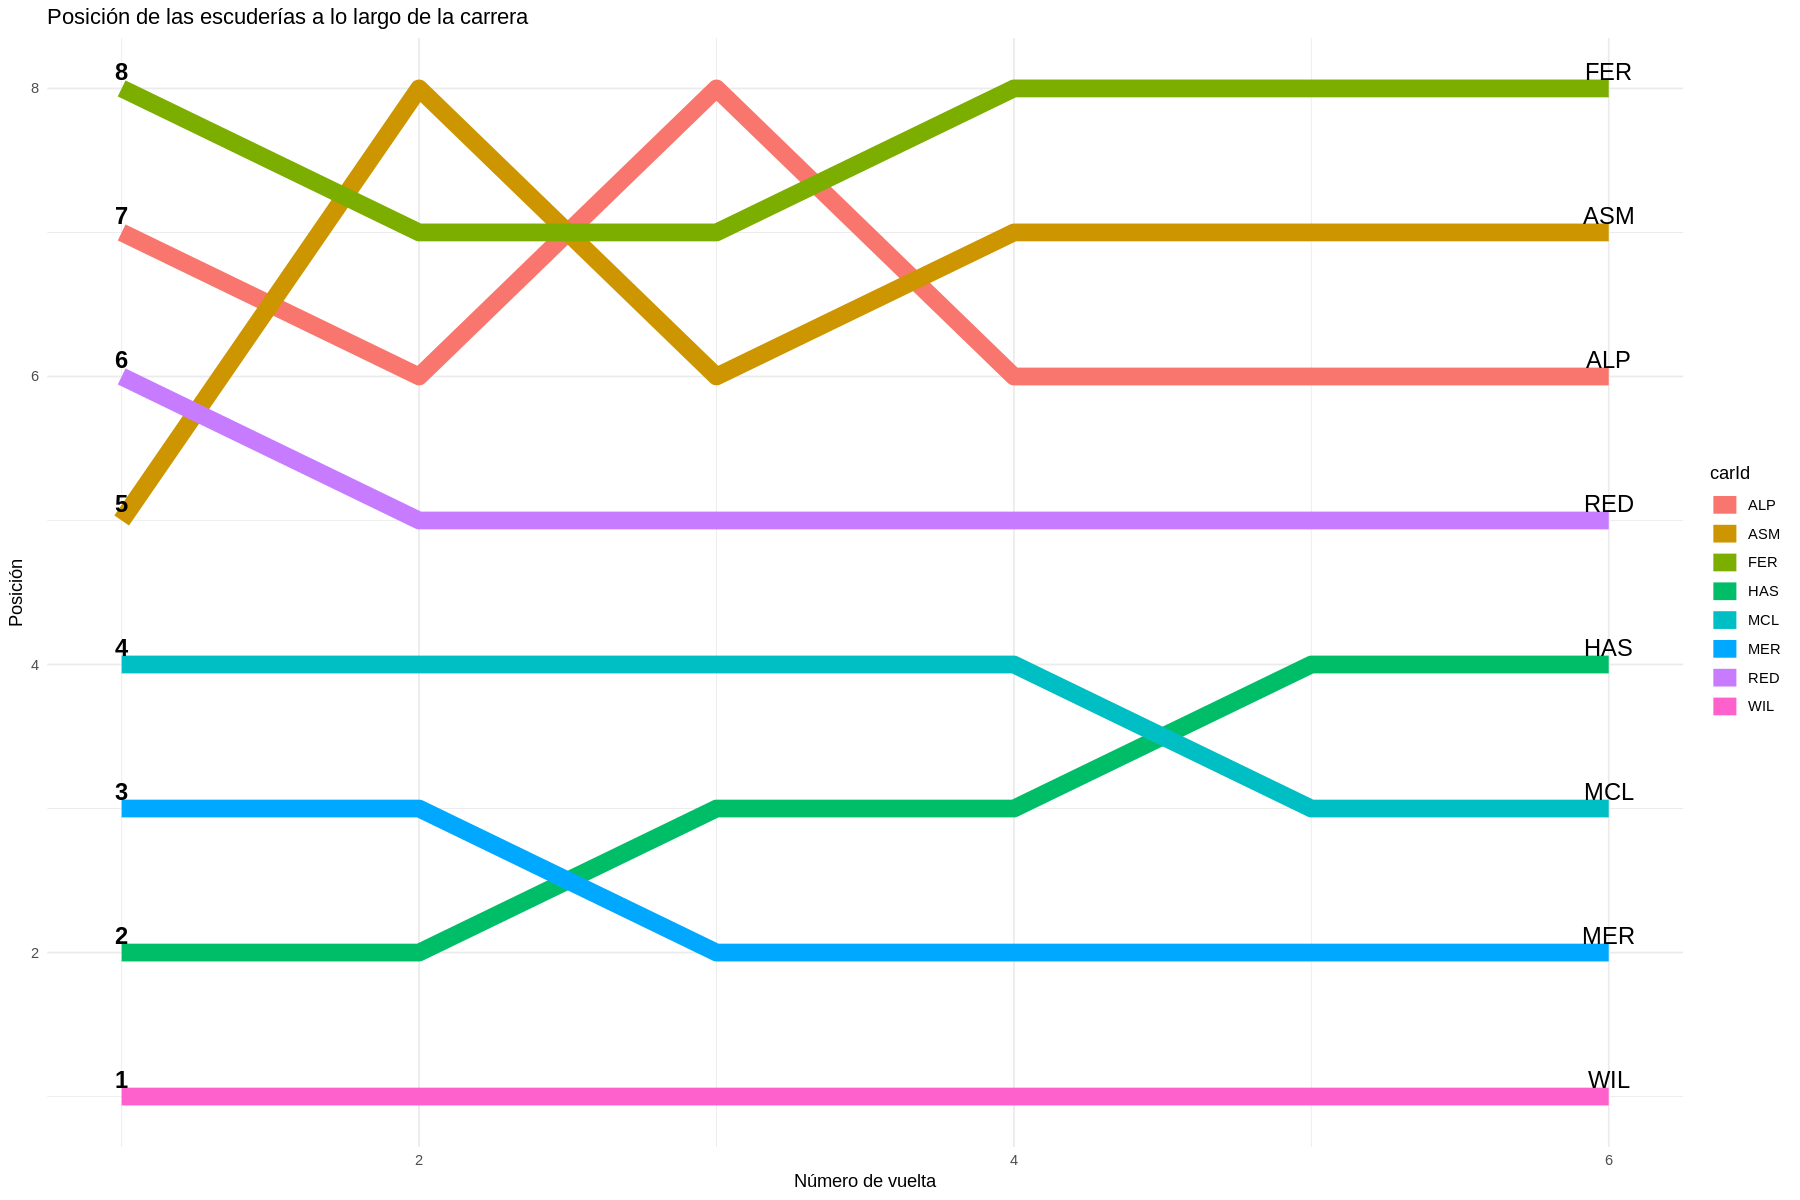

In [ ]:
ggplot(tel4, aes(x = lapNum, y = posicion, color = carId, group = carId, fill = carId)) +
  geom_line(size = 5) +  # Aumentar el grosor de las líneas
  labs(x = "Número de vuelta", y = "Posición", title = "Posición de las escuderías a lo largo de la carrera") +
  theme_minimal() +

  # Añadir los nombres de las escuderías al final de cada línea
  geom_text(data = tel4 %>%
        filter(lapNum == 6),
        aes(label = carId),
        vjust = -0.5, size = 5, color = "black") +
  # Añadir la posición al principio de cada línea (lapNum == 1)
  geom_text(data = tel4 %>% filter(lapNum == 1),
            aes(label = as.character(posicion)),
            vjust = -0.5, size = 5, color = "black", fontface = "bold")

# 6.

[VOLVER](#scrollTo=2-wU-YtgHjvd)

6. Elabore un gráfico que muestre la velocidad máxima para cada uno de los vehículos, ordenado desde el más rápido al más lento. En el eje de las abscisas (X), se representarán los vehículos, mientras que en el eje de las ordenadas (Y) se plasmará la velocidad máxima por cada vehículo.

In [ ]:
colnames(tel33)

[1] "carId"     "max_speed"

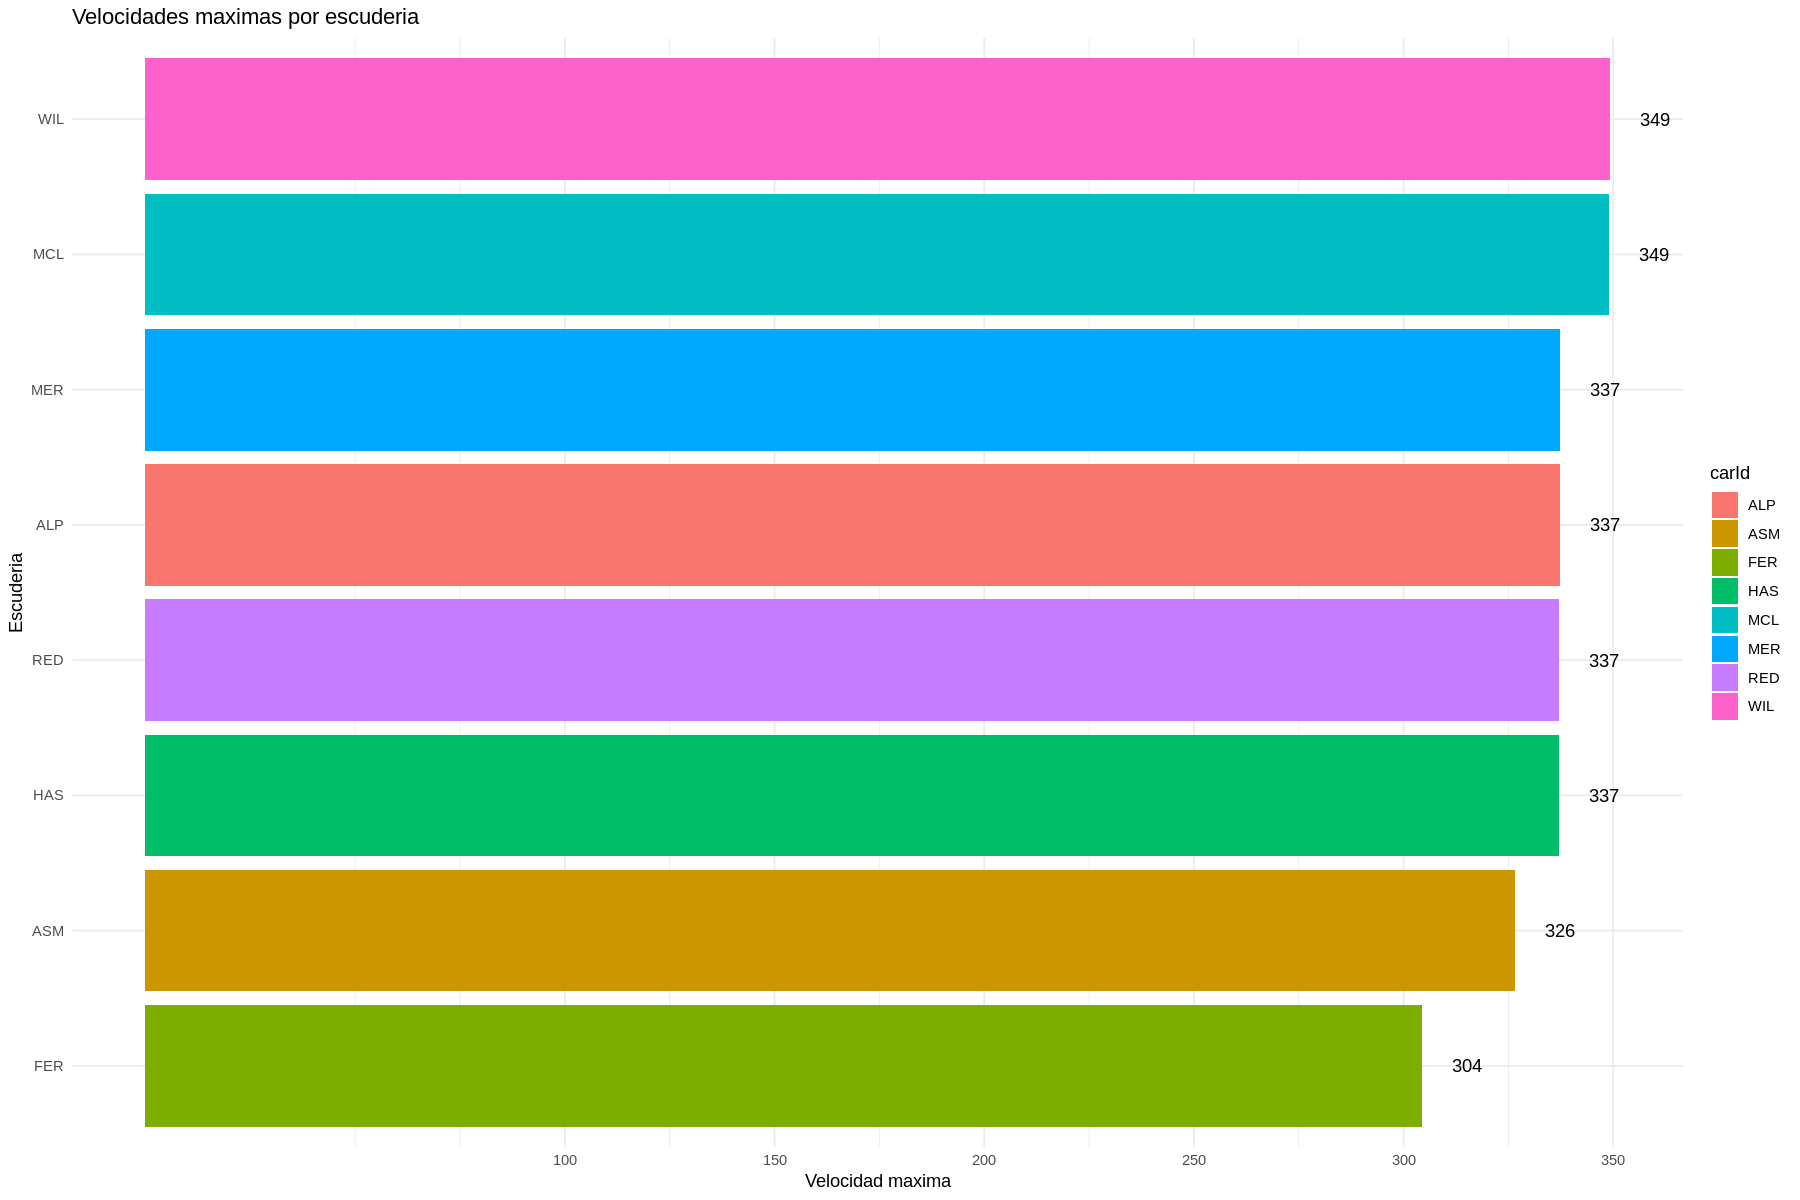

In [ ]:
ggplot(tel33, aes(x = reorder(carId, max_speed), y = max_speed, fill = carId)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  geom_text(aes(label = round(max_speed), hjust = -1)) +
  labs(
    title = "Velocidades maximas por escuderia",
    x = "Escuderia",
    y = "Velocidad maxima"
  ) +
  theme_minimal() +
  scale_y_continuous(
    breaks = seq(100, 350, by = 50) #Genera una secuencia que empieza en 100 y llega hasta 350, las marcas estan separadas cada 50 unidades.
  )

# 7.

[VOLVER](#scrollTo=2-wU-YtgHjvd)

Represente gráficamente la información correspondiente a las máximas velocidades por vuelta para cada vehículo mediante diagramas de caja (boxplots) y diagrama de violín. Gráfico similar al punto 2. Son dos gráficos por separado.

In [ ]:
tel7 <- tel %>%
  select(carId, lapNum, velocity_X, velocity_Y, velocity_Z) %>%
  mutate(speed = sqrt(tel$velocity_X^2+tel$velocity_Y^2+tel$velocity_Z^2)*3.6) %>%
  group_by(carId, lapNum) %>%
  summarize(max_speed = max(speed, na.rm = TRUE))

head(tel7, 3)

`summarise()` has grouped output by 'carId'. You can override using the
`.groups` argument.


carId,lapNum,max_speed
<chr>,<dbl>,<dbl>
ALP,1,335.8681
ALP,2,336.9346
ALP,3,336.3370


## Box plot

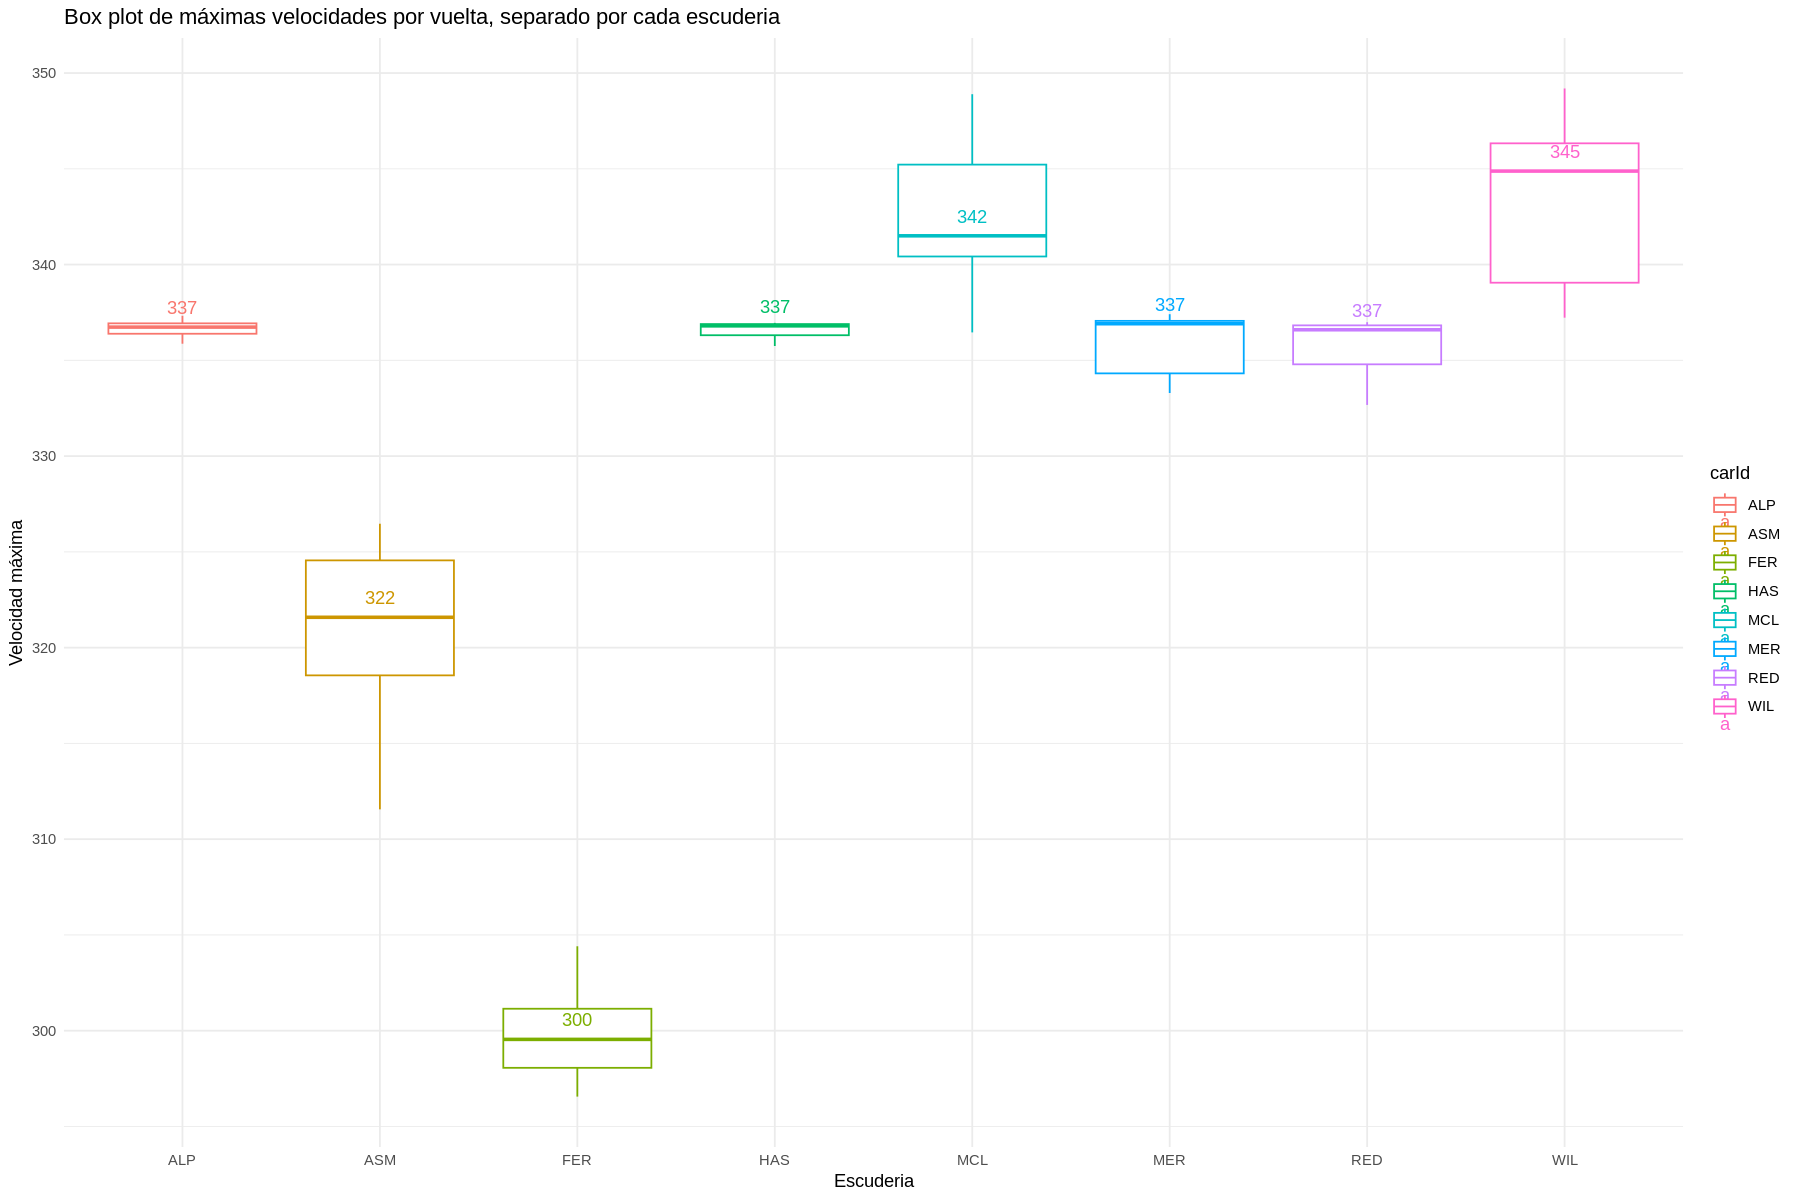

In [ ]:
ggplot(tel7, aes(x = carId, y = max_speed, color = carId)) +
  geom_boxplot() +
  stat_summary(fun = median, geom = "text", aes(label = round(..y.., 0)), vjust = -1) + #Marcamos la mediana y le mostramos el valor
  labs(x = "Escuderia", y = "Velocidad máxima", title = "Box plot de máximas velocidades por vuelta, separado por cada escuderia") +
  theme_minimal() +
  scale_x_discrete() +
  scale_y_continuous()

#stat_summary(fun = median, geom = "text", aes(label = round(..y.., 2)), vjust = -1):
#fun = median: Calcula la mediana de los valores para cada grupo.
#geom = "text": Agrega texto en lugar de una línea o puntos.
#aes(label = round(..y.., 2)): Usa la mediana calculada (..y..) y la redondea a 2 decimales para mostrarla como una etiqueta.
#vjust = -1: Ajusta la posición vertical del texto para que se coloque justo encima del boxplot.

## Diagrama de violin

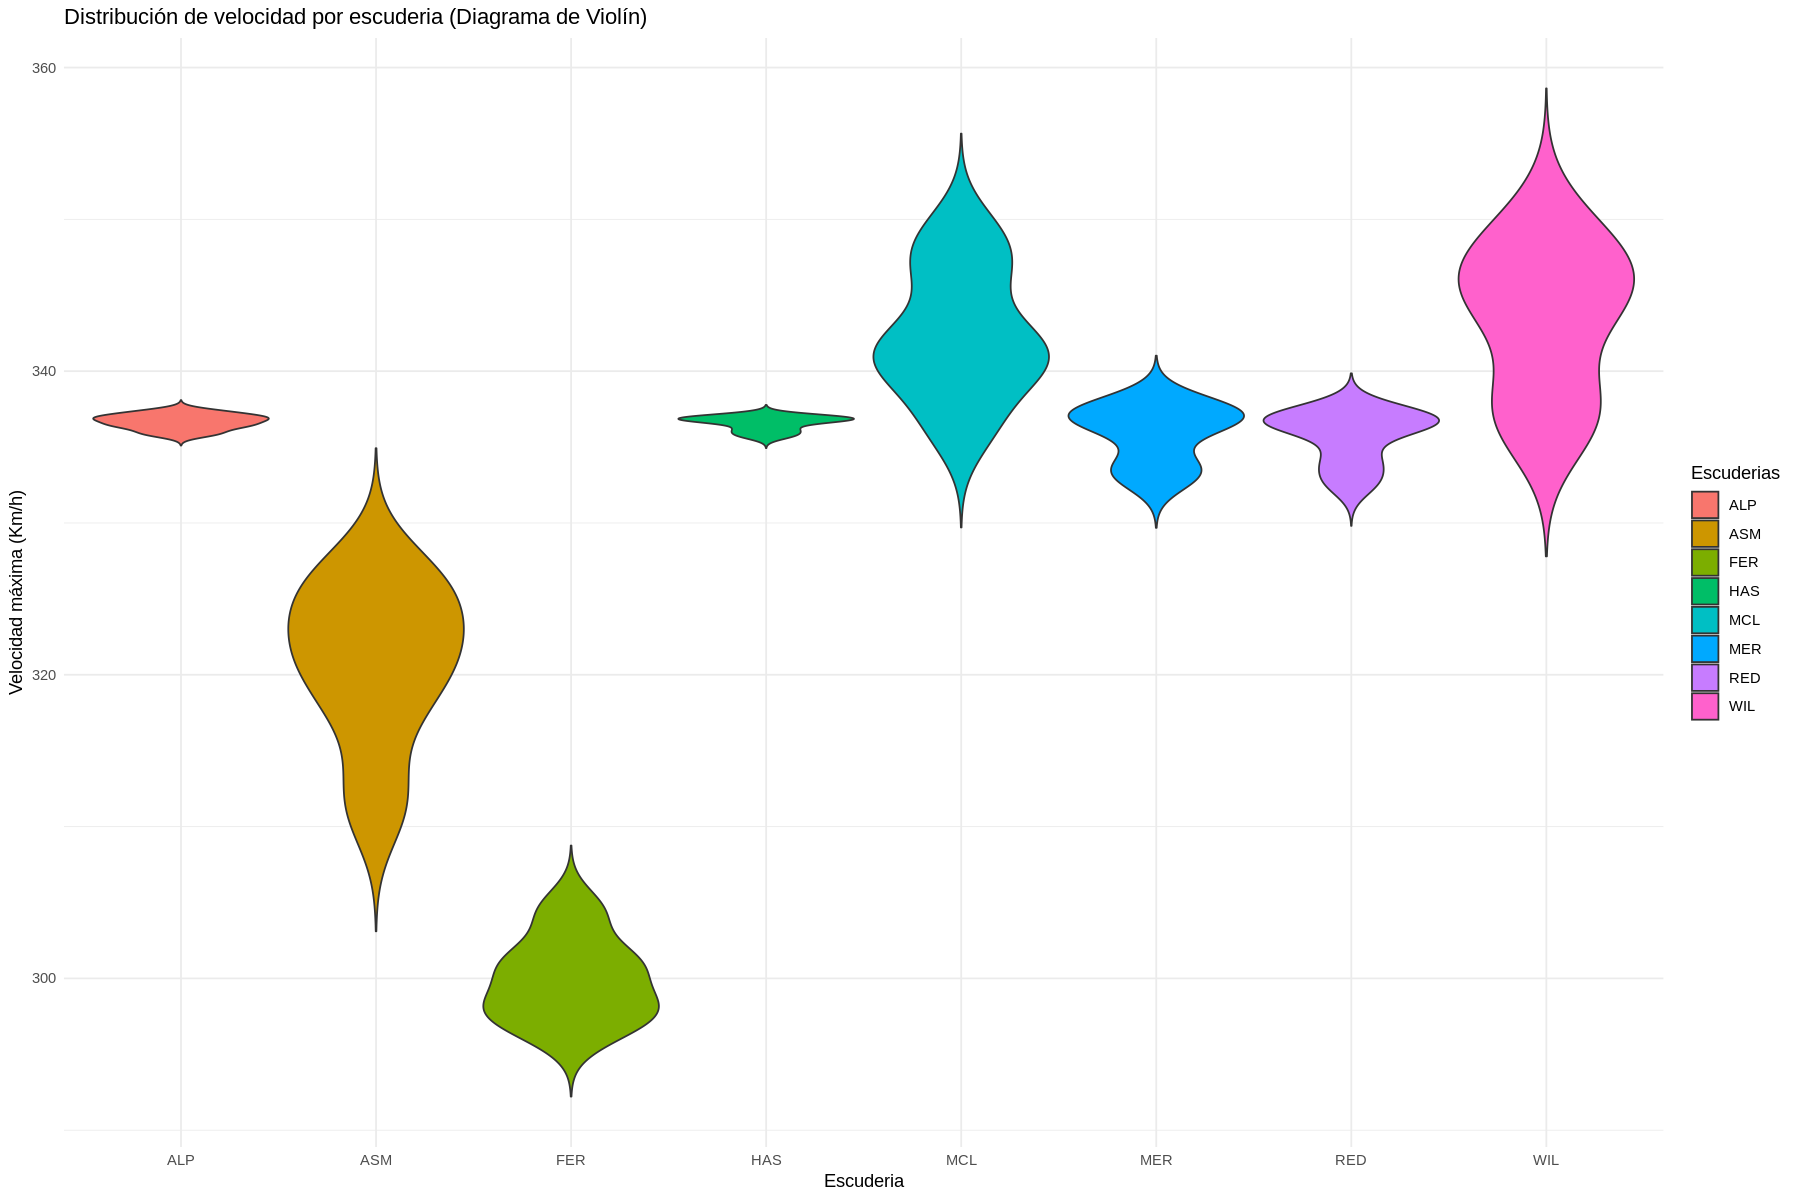

In [ ]:
ggplot(tel7, aes(x = carId, y = max_speed, fill = carId)) +
  geom_violin(trim = FALSE, scale="width") +  # 'trim = FALSE' asegura que los violines no se recorten
  labs(x = "Escuderia", y = "Velocidad máxima (Km/h)", title = "Distribución de velocidad por escuderia (Diagrama de Violín)") +
  theme_minimal() +
  guides(fill = guide_legend(title = "Escuderias")) +
  scale_x_discrete() +
  scale_y_continuous()

# 8

[VOLVER](#scrollTo=2-wU-YtgHjvd)

Elabore un gráfico que muestren los mejores tiempos para cada uno de los vehículos en cada uno de los sectores, ordenando los tiempos de menor a mayor. En el eje de las abscisas (X), se representarán los vehículos, mientras que en el eje de las ordenadas (Y) se plasmará el tiempo empleado por cada.

In [ ]:
tel32

carId,s1,s2,s3
<chr>,<dbl>,<dbl>,<dbl>
ALP,27.8570,30.6655,27.7675
ASM,29.1293,33.9873,31.2760
FER,30.7804,36.5827,33.0903
HAS,27.6740,30.6375,28.4770
MCL,27.7150,29.9850,27.5800
MER,27.5770,29.5750,27.7165
RED,28.1490,32.6420,28.1470
WIL,26.9837,29.1385,27.0435


In [ ]:
GS1 <- ggplot(tel32, aes(x = reorder(carId, s1), y = s1, fill = carId)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Mejores tiempos por escuderia en S1",
    x = "Vehículo",
    y = "Mejor Tiempo (segundos)"
  ) +
  geom_text(aes(label = paste0(
    floor(s1 / 60), ":", str_pad(floor(s1 %% 60), 2, pad = "0"), ":",
    str_pad(round((s1 %% 1) * 1000), 3, pad = "0"))), vjust = -0.5, size = 3) +  # Añadir etiquetas sobre las barras
  theme_minimal() +
  scale_y_continuous(labels = function(x) paste0(
    floor(x / 60), ":", str_pad(floor(x %% 60), 2, pad = "0"), ":",
    str_pad(round((x %% 1) * 1000), 3, pad = "0")
  )) + # Mostrar en formato minutos:segundos:milisegundos en el eje Y
  scale_x_discrete() +
  scale_fill_brewer(palette = "Set3")

GS2 <- ggplot(tel32, aes(x = reorder(carId, s2), y = s2, fill = carId)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Mejores tiempos por escuderia en S2",
    x = "Vehículo",
    y = "Mejor Tiempo (segundos)"
  ) +
  geom_text(aes(label = paste0(
    floor(s2 / 60), ":", str_pad(floor(s2 %% 60), 2, pad = "0"), ":",
    str_pad(round((s2 %% 1) * 1000), 3, pad = "0"))), vjust = -0.5, size = 3) +  # Añadir etiquetas sobre las barras
  theme_minimal() +
  scale_y_continuous(labels = function(x) paste0(
    floor(x / 60), ":", str_pad(floor(x %% 60), 2, pad = "0"), ":",
    str_pad(round((x %% 1) * 1000), 3, pad = "0")
  )) +
  scale_x_discrete() +
  scale_fill_brewer(palette = "Set3")

GS3 <- ggplot(tel32, aes(x = reorder(carId, s3), y = s3, fill = carId)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(
    title = "Mejores tiempos por escuderia en S3",
    x = "Vehículo",
    y = "Mejor Tiempo (segundos)"
  ) +
  geom_text(aes(label = paste0(
    floor(s3 / 60), ":", str_pad(floor(s3 %% 60), 2, pad = "0"), ":",
    str_pad(round((s3 %% 1) * 1000), 3, pad = "0"))), vjust = -0.5, size = 3) +
  theme_minimal() +
  scale_y_continuous(labels = function(x) paste0(
    floor(x / 60), ":", str_pad(floor(x %% 60), 2, pad = "0"), ":",
    str_pad(round((x %% 1) * 1000), 3, pad = "0")
  )) +
  scale_x_discrete() +
  scale_fill_brewer(palette = "Set3")

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 15)  # establece un tamaño predeterminado para los plots

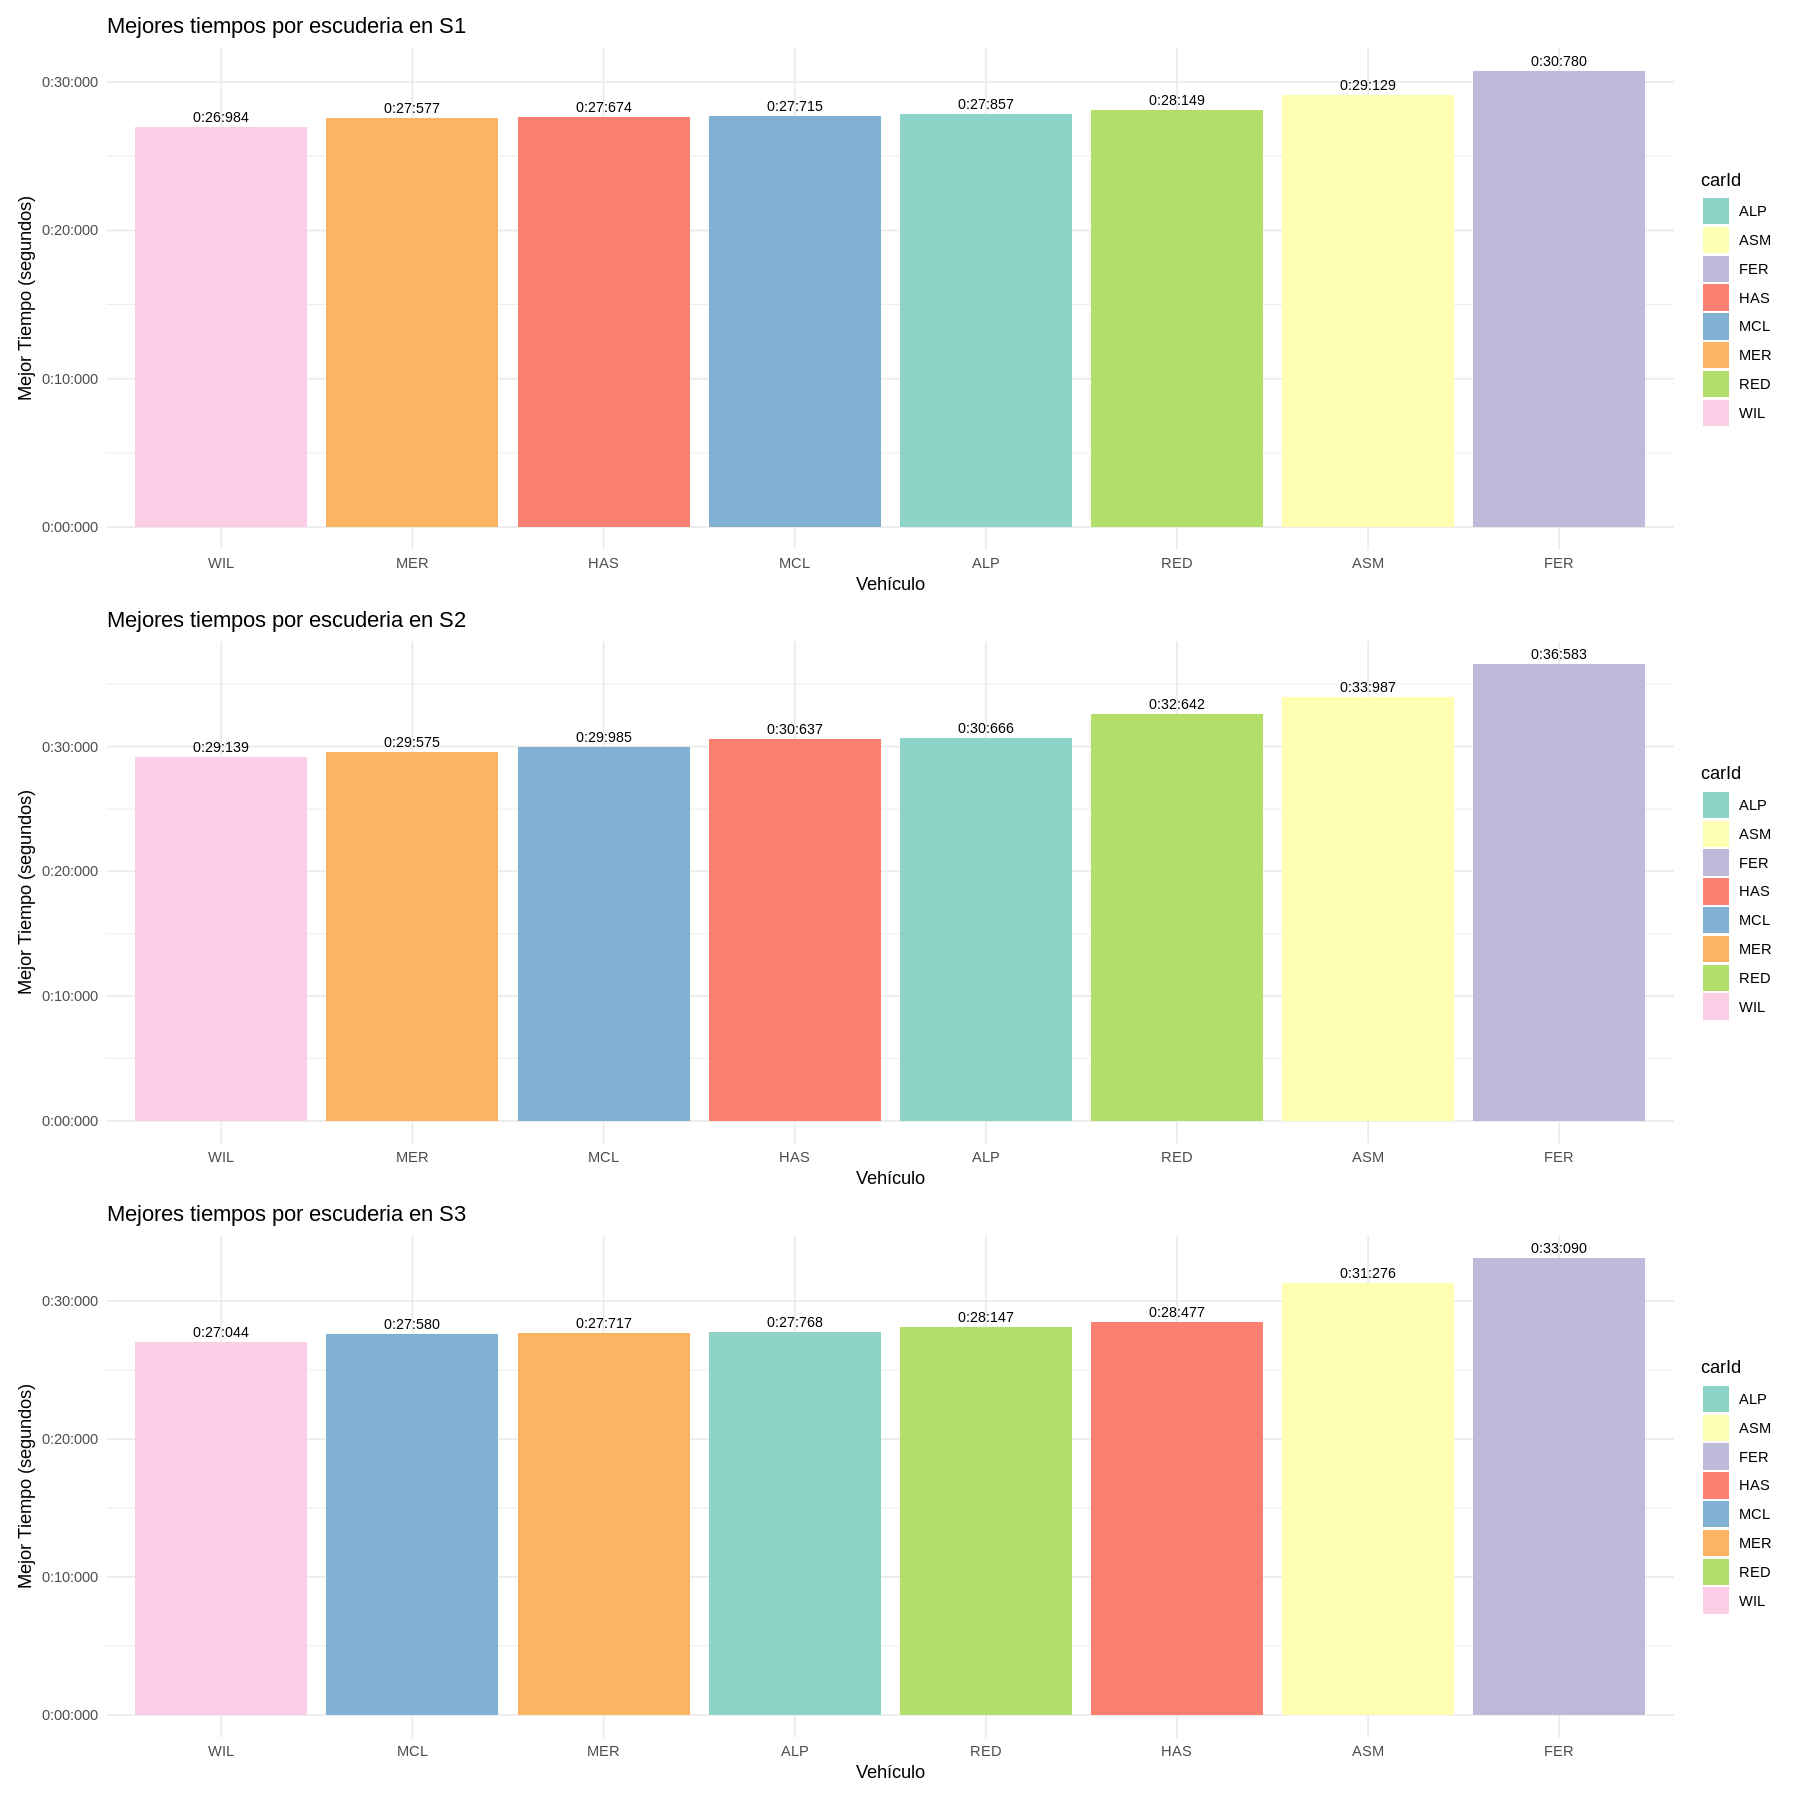

In [ ]:
GS1 / GS2 / GS3 #unimos los 3 graficos de barras en una misma hoja

# 9.

[VOLVER](#scrollTo=2-wU-YtgHjvd)

Elabore un gráfico que muestre en primer lugar el vehículo más rápido (tiempo de vuelta promedio) y a continuación el gap en segundos con cada uno de los demás vehículos. En el eje de las abscisas (X), se representarán los valores diferenciales, mientras que en el eje de las ordenadas (Y) se plasmará los vehículos.

In [ ]:
colnames(tel1)

[1] "carId"  "lapNum" "tiempo"

In [ ]:
tel9 <- tel1 %>%
  select(carId, lapNum, tiempo) %>%
  group_by(carId) %>%
  summarize(vueltaProm = mean(tiempo)) %>%
  mutate(gap = vueltaProm - min(vueltaProm)) %>%
  arrange(gap)


head(tel9, 3)


carId,vueltaProm,gap
<chr>,<dbl>,<dbl>
WIL,85.95600,0.000000
MER,87.00750,1.051500
MCL,88.38467,2.428667


In [ ]:
options(repr.plot.width = 20, repr.plot.height = 10)  # establece un tamaño predeterminado para los plots

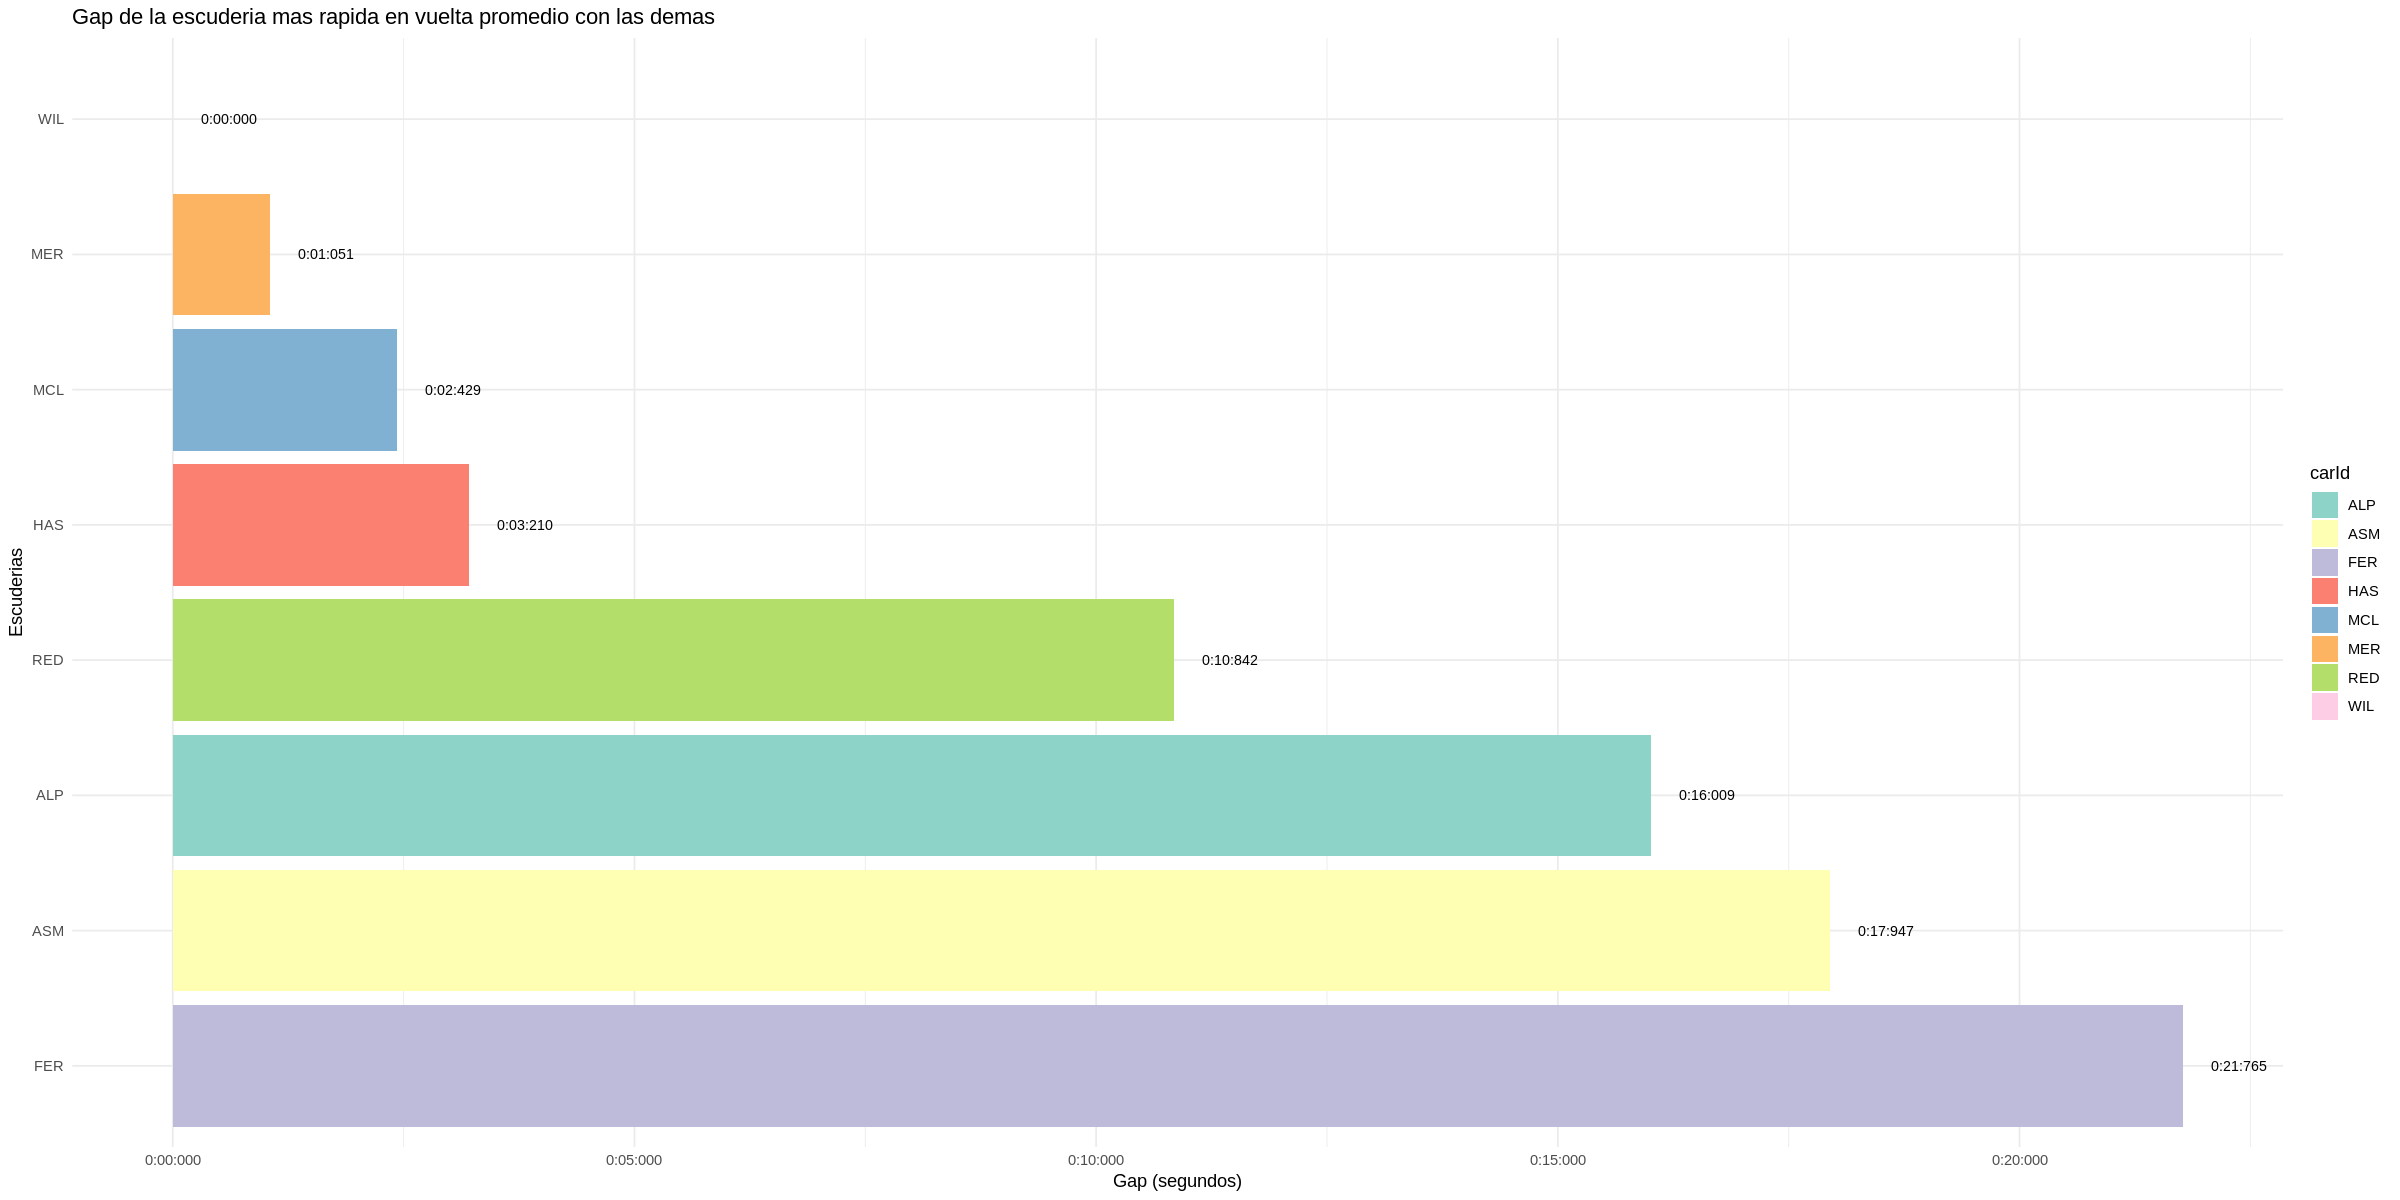

In [ ]:
ggplot(tel9, aes(x = gap, y = reorder(carId, -gap), fill = carId)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = paste0(
    floor(gap / 60), ":", str_pad(floor(gap %% 60), 2, pad = "0"), ":",
    str_pad(round((gap %% 1) * 1000), 3, pad = "0"))), hjust = -0.5, size = 3) +
  labs(
    x = "Gap (segundos)",
    y = "Escuderias",
    title = "Gap de la escuderia mas rapida en vuelta promedio con las demas"
  ) +
  theme_minimal() +
  scale_x_continuous(
    labels = function(x) paste0(
      floor(x / 60), ":", str_pad(floor(x %% 60), 2, pad = "0"), ":",
      str_pad(round((x %% 1) * 1000), 3, pad = "0")
    ),
    breaks = seq(0, max(tel9$gap), by = 5)  # Establece un intervalo de 5 segundos para las marcas
  ) +
  scale_fill_brewer(palette = "Set3")

# 10.

[VOLVER](#scrollTo=2-wU-YtgHjvd)

Elabore un gráfico que muestre la velocidad máxima para cada uno de los vehículos, ordenado desde el más rápido al más lento SOLO TENIENDO EN CUENTA LAS VUELTAS VALIDAS. En el eje de las abscisas (X), se representarán los vehículos, mientras que en el eje de las ordenadas (Y) se plasmará la velocidad máxima por cada vehículo.

In [ ]:
tel10 <- inner_join(tel, tel33) %>%
  select(carId, lap_time_invalid, max_speed) %>%
  filter(lap_time_invalid == 0) %>%
  group_by(carId) %>%
  distinct(carId, .keep_all = TRUE) %>%  # Esto asegura que se mantenga solo un valor único de carId
  select(-lap_time_invalid) %>%
  arrange(desc(max_speed))

tel10

Joining with `by = join_by(carId)`


carId,max_speed
<chr>,<dbl>
WIL,349.1968
MCL,348.8944
MER,337.4084
ALP,337.3254
RED,336.9915
HAS,336.9559
ASM,326.4707
FER,304.4076


In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)  # establece un tamaño predeterminado para los plots

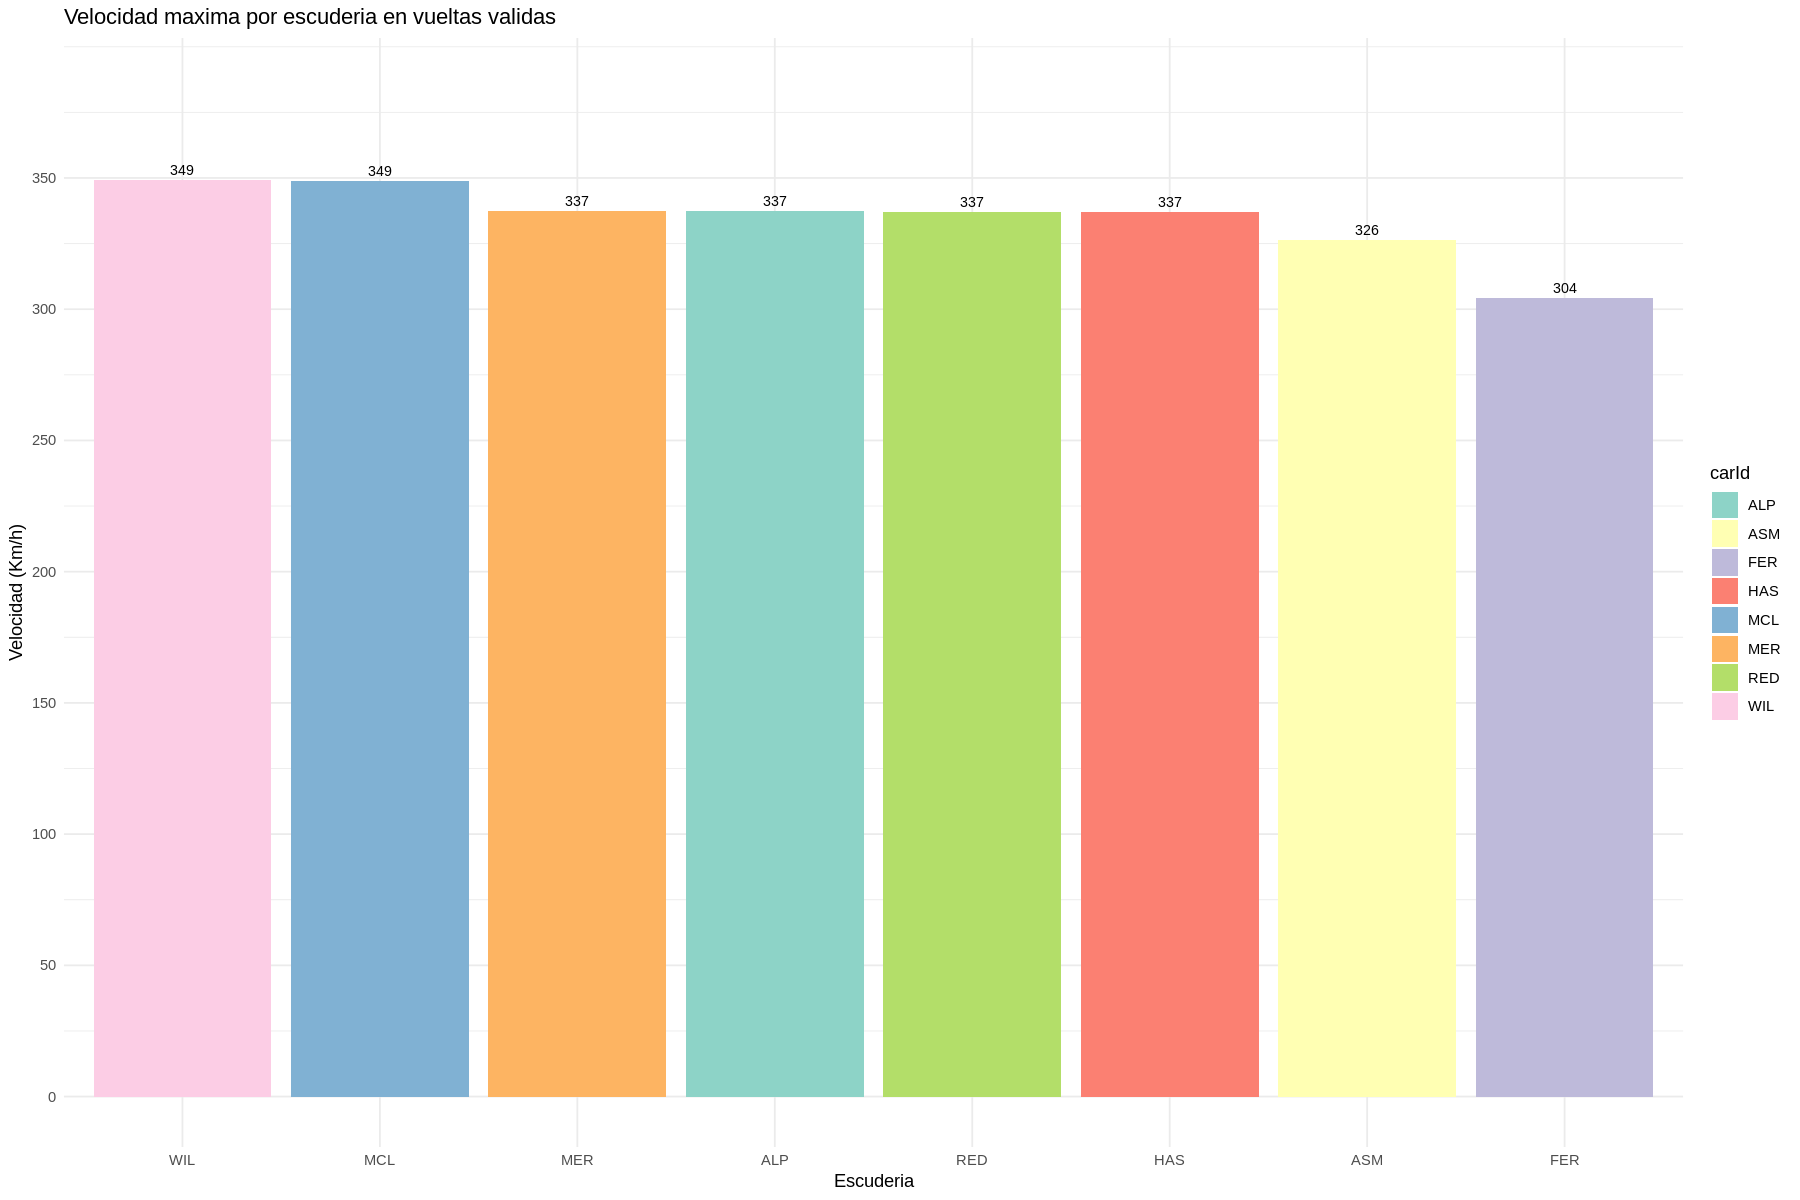

In [ ]:
ggplot(tel10, aes(x = reorder(carId, -max_speed), y = max_speed, fill = carId)) +
  geom_bar(stat = "identity") +
  geom_text(aes(label = round(max_speed)), vjust = -0.5, size = 3) +  # Añadir etiquetas sobre las barras
  labs(
    title = "Velocidad maxima por escuderia en vueltas validas",
    x = "Escuderia",
    y = "Velocidad (Km/h)"
  ) +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3") +
  scale_y_continuous(
    limits = c(0, max(tel10$max_speed) * 1.1),  # Establecer límites más grandes en el eje Y (10% mayor que el máximo)
    breaks = seq(0, max(tel10$max_speed) * 1.1, by = 50)  # Establecer los "breaks" cada 10 unidades
  )